In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import tarfile
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder,StandardScaler, Normalizer
from sklearn.metrics import confusion_matrix, accuracy_score,plot_confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import SGDClassifier
from mlxtend.plotting import plot_decision_regions
from mlxtend.evaluate import bootstrap_point632_score
import tensorflow as tf
from tensorflow import keras
!pip install scikeras
from scikeras.wrappers import KerasClassifier
import warnings
#### MLXTEND install & import ####
!pip install mlxtend
import mlxtend as ml
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=matplotlib.cbook.mplDeprecation)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Pre-Processing

In [ ]:
# import the android data
android_data =pd.read_csv('data (1).csv')
android_data.head()

android.permission.GET_ACCOUNTS  \
0                                0   
1                                0   
2                                0   
3                                0   
4                                0   

   com.sonyericsson.home.permission.BROADCAST_BADGE  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   android.permission.READ_PROFILE  android.permission.MANAGE_ACCOUNTS  \
0                                0                                   0   
1                                0                                   0   
2                                0                                   0   
3                                0                                   0   
4                                0                                   0   

   android.permission.WRITE_SYNC_SETTINGS  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   android.permission.READ_EXTERNAL_STORAGE  android.permission.RECEIVE_SMS  \
0                                         0                               0   
1                                         1                               0   
2                                         0                               0   
3                                         0                               0   
4                                         0                               0   

   com.android.launcher.permission.READ_SETTINGS  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   android.permission.WRITE_SETTINGS  \
0                                  0   
1                                  0   
2                                  0   
3                                  0   
4                                  0   

   com.google.android.providers.gsf.permission.READ_GSERVICES  ...  \
0                                                  0           ...   
1                                                  0           ...   
2                                                  0           ...   
3                                                  0           ...   
4                                                  0           ...   

   com.android.launcher.permission.UNINSTALL_SHORTCUT  \
0                                                  0    
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  0    

   com.sec.android.iap.permission.BILLING  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   com.htc.launcher.permission.UPDATE_SHORTCUT  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   com.sec.android.provider.badge.permission.WRITE  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   android.permission.ACCESS_NETWORK_

In [ ]:
android_data.shape

(29332, 87)

In [ ]:
#Split train/test split
train, test = train_test_split(android_data, test_size=0.30, random_state=42)

In [ ]:
train.describe()

android.permission.GET_ACCOUNTS  \
count                     20532.000000   
mean                          0.227791   
std                           0.419417   
min                           0.000000   
25%                           0.000000   
50%                           0.000000   
75%                           0.000000   
max                           1.000000   

       com.sonyericsson.home.permission.BROADCAST_BADGE  \
count                                      20532.000000   
mean                                           0.035408   
std                                            0.184814   
min                                            0.000000   
25%                                            0.000000   
50%                                            0.000000   
75%                                            0.000000   
max                                            1.000000   

       android.permission.READ_PROFILE  android.permission.MANAGE_ACCOUNTS  \
count                     20532.000000                        20532.000000   
mean                          0.048120                            0.014709   
std                           0.214025                            0.120387   
min                           0.000000                            0.000000   
25%                           0.000000                            0.000000   
50%                           0.000000                            0.000000   
75%                           0.000000                            0.000000   
max                           1.000000                            1.000000   

       android.permission.WRITE_SYNC_SETTINGS  \
count                            20532.000000   
mean                                 0.005796   
std                                  0.075911   
min                                  0.000000   
25%                                  0.000000   
50%                                  0.000000   
75%                                  0.000000   
max                                  1.000000   

       android.permission.READ_EXTERNAL_STORAGE  \
count                              20532.000000   
mean                                   0.171099   
std                                    0.376604   
min                                    0.000000   
25%                                    0.000000   
50%                                    0.000000   
75%                                    0.000000   
max                                    1.000000   

       android.permission.RECEIVE_SMS  \
count                    20532.000000   
mean                         0.059468   
std                          0.236505   
min                          0.000000   
25%                          0.000000   
50%                          0.000000   
75%                          0.000000   
max                          1.000000   

       com.android.launcher.permission.READ_SETTINGS  \
count                                   20532.000000   
mean                                        0.014514   
std                                         0.119599   
min                                         0.000000   
25%                                         0.000000   
50%                                         0.000000   
75%                                         0.000000   
max                                         1.000000   

       android.permission.WRITE_SETTINGS  \
count                       20532.000000   
mean                            0.112800   
std                             0.316355   
min                             0.000000   
25%                             0.000000   
50%                             0.000000   
75%                             0.000000   
max                             1.000000   

       com.google.android.providers.gsf.permission.READ_GSERVICES  ...  \
count                                       20532.000000           ...   
mean                                            0.043006           ... 

In [ ]:
# Evaluate means of binary features to explore frequency
means = train.mean().sort_values(ascending=False)
means.head(15)

In [ ]:
custom = train.filter(regex = "^com|Result|^me").columns
custom

Index(['com.sonyericsson.home.permission.BROADCAST_BADGE',
       'com.android.launcher.permission.READ_SETTINGS',
       'com.google.android.providers.gsf.permission.READ_GSERVICES',
       'com.huawei.android.launcher.permission.CHANGE_BADGE',
       'com.oppo.launcher.permission.READ_SETTINGS',
       'com.android.launcher.permission.INSTALL_SHORTCUT',
       'com.samsung.android.providers.context.permission.WRITE_USE_APP_FEATURE_SURVEY',
       'com.majeur.launcher.permission.UPDATE_BADGE',
       'com.htc.launcher.permission.READ_SETTINGS',
       'com.anddoes.launcher.permission.UPDATE_COUNT',
       'com.android.alarm.permission.SET_ALARM',
       'com.google.android.c2dm.permission.RECEIVE',
       'com.sonymobile.home.permission.PROVIDER_INSERT_BADGE',
       'com.sec.android.provider.badge.permission.READ',
       'com.huawei.android.launcher.permission.WRITE_SETTINGS',
       'com.oppo.launcher.permission.WRITE_SETTINGS',
       'me.everything.badger.permission.BADGE_COUNT_W

In [ ]:
# Create a numeric dataframe
custom_df = pd.DataFrame()

# Import custom permission features from train (contain com. in name)
custom_df[custom] = train[custom]

In [ ]:
# Segregate observations identified as malware
malware_custom = custom_df.loc[custom_df['Result'] == 1]
# Find the sum/frequency of each permissions occurence for malware (0=permission not used in malware observations)
malware_custom.sum().sort_values(ascending=False)

Result                                                                           10319
com.android.launcher.permission.INSTALL_SHORTCUT                                  4090
com.android.launcher.permission.UNINSTALL_SHORTCUT                                 484
com.android.vending.BILLING                                                        469
com.android.vending.CHECK_LICENSE                                                  248
com.android.launcher.permission.READ_SETTINGS                                      219
com.htc.launcher.permission.READ_SETTINGS                                          157
com.google.android.c2dm.permission.RECEIVE                                         146
com.google.android.providers.gsf.permission.READ_GSERVICES                          40
com.google.android.gms.permission.ACTIVITY_RECOGNITION                              21
com.android.alarm.permission.SET_ALARM                                               8
com.huawei.android.launcher.permission.READ

In [ ]:
# Segregate observations identified as benign
benign_custom = custom_df.loc[custom_df['Result'] == 0]
# Find the sum/frequency of each permissions occurence for benign (0=permission not used in benign observations)
benign_custom.sum().sort_values(ascending=False)

com.google.android.c2dm.permission.RECEIVE                                       4170
com.android.vending.BILLING                                                      2252
com.google.android.providers.gsf.permission.READ_GSERVICES                        843
com.sec.android.provider.badge.permission.WRITE                                   728
com.sec.android.provider.badge.permission.READ                                    727
com.sonyericsson.home.permission.BROADCAST_BADGE                                  726
com.htc.launcher.permission.READ_SETTINGS                                         724
com.htc.launcher.permission.UPDATE_SHORTCUT                                       711
com.anddoes.launcher.permission.UPDATE_COUNT                                      699
com.majeur.launcher.permission.UPDATE_BADGE                                       693
com.google.android.finsky.permission.BIND_GET_INSTALL_REFERRER_SERVICE            495
com.huawei.android.launcher.permission.READ_SETTINGS  

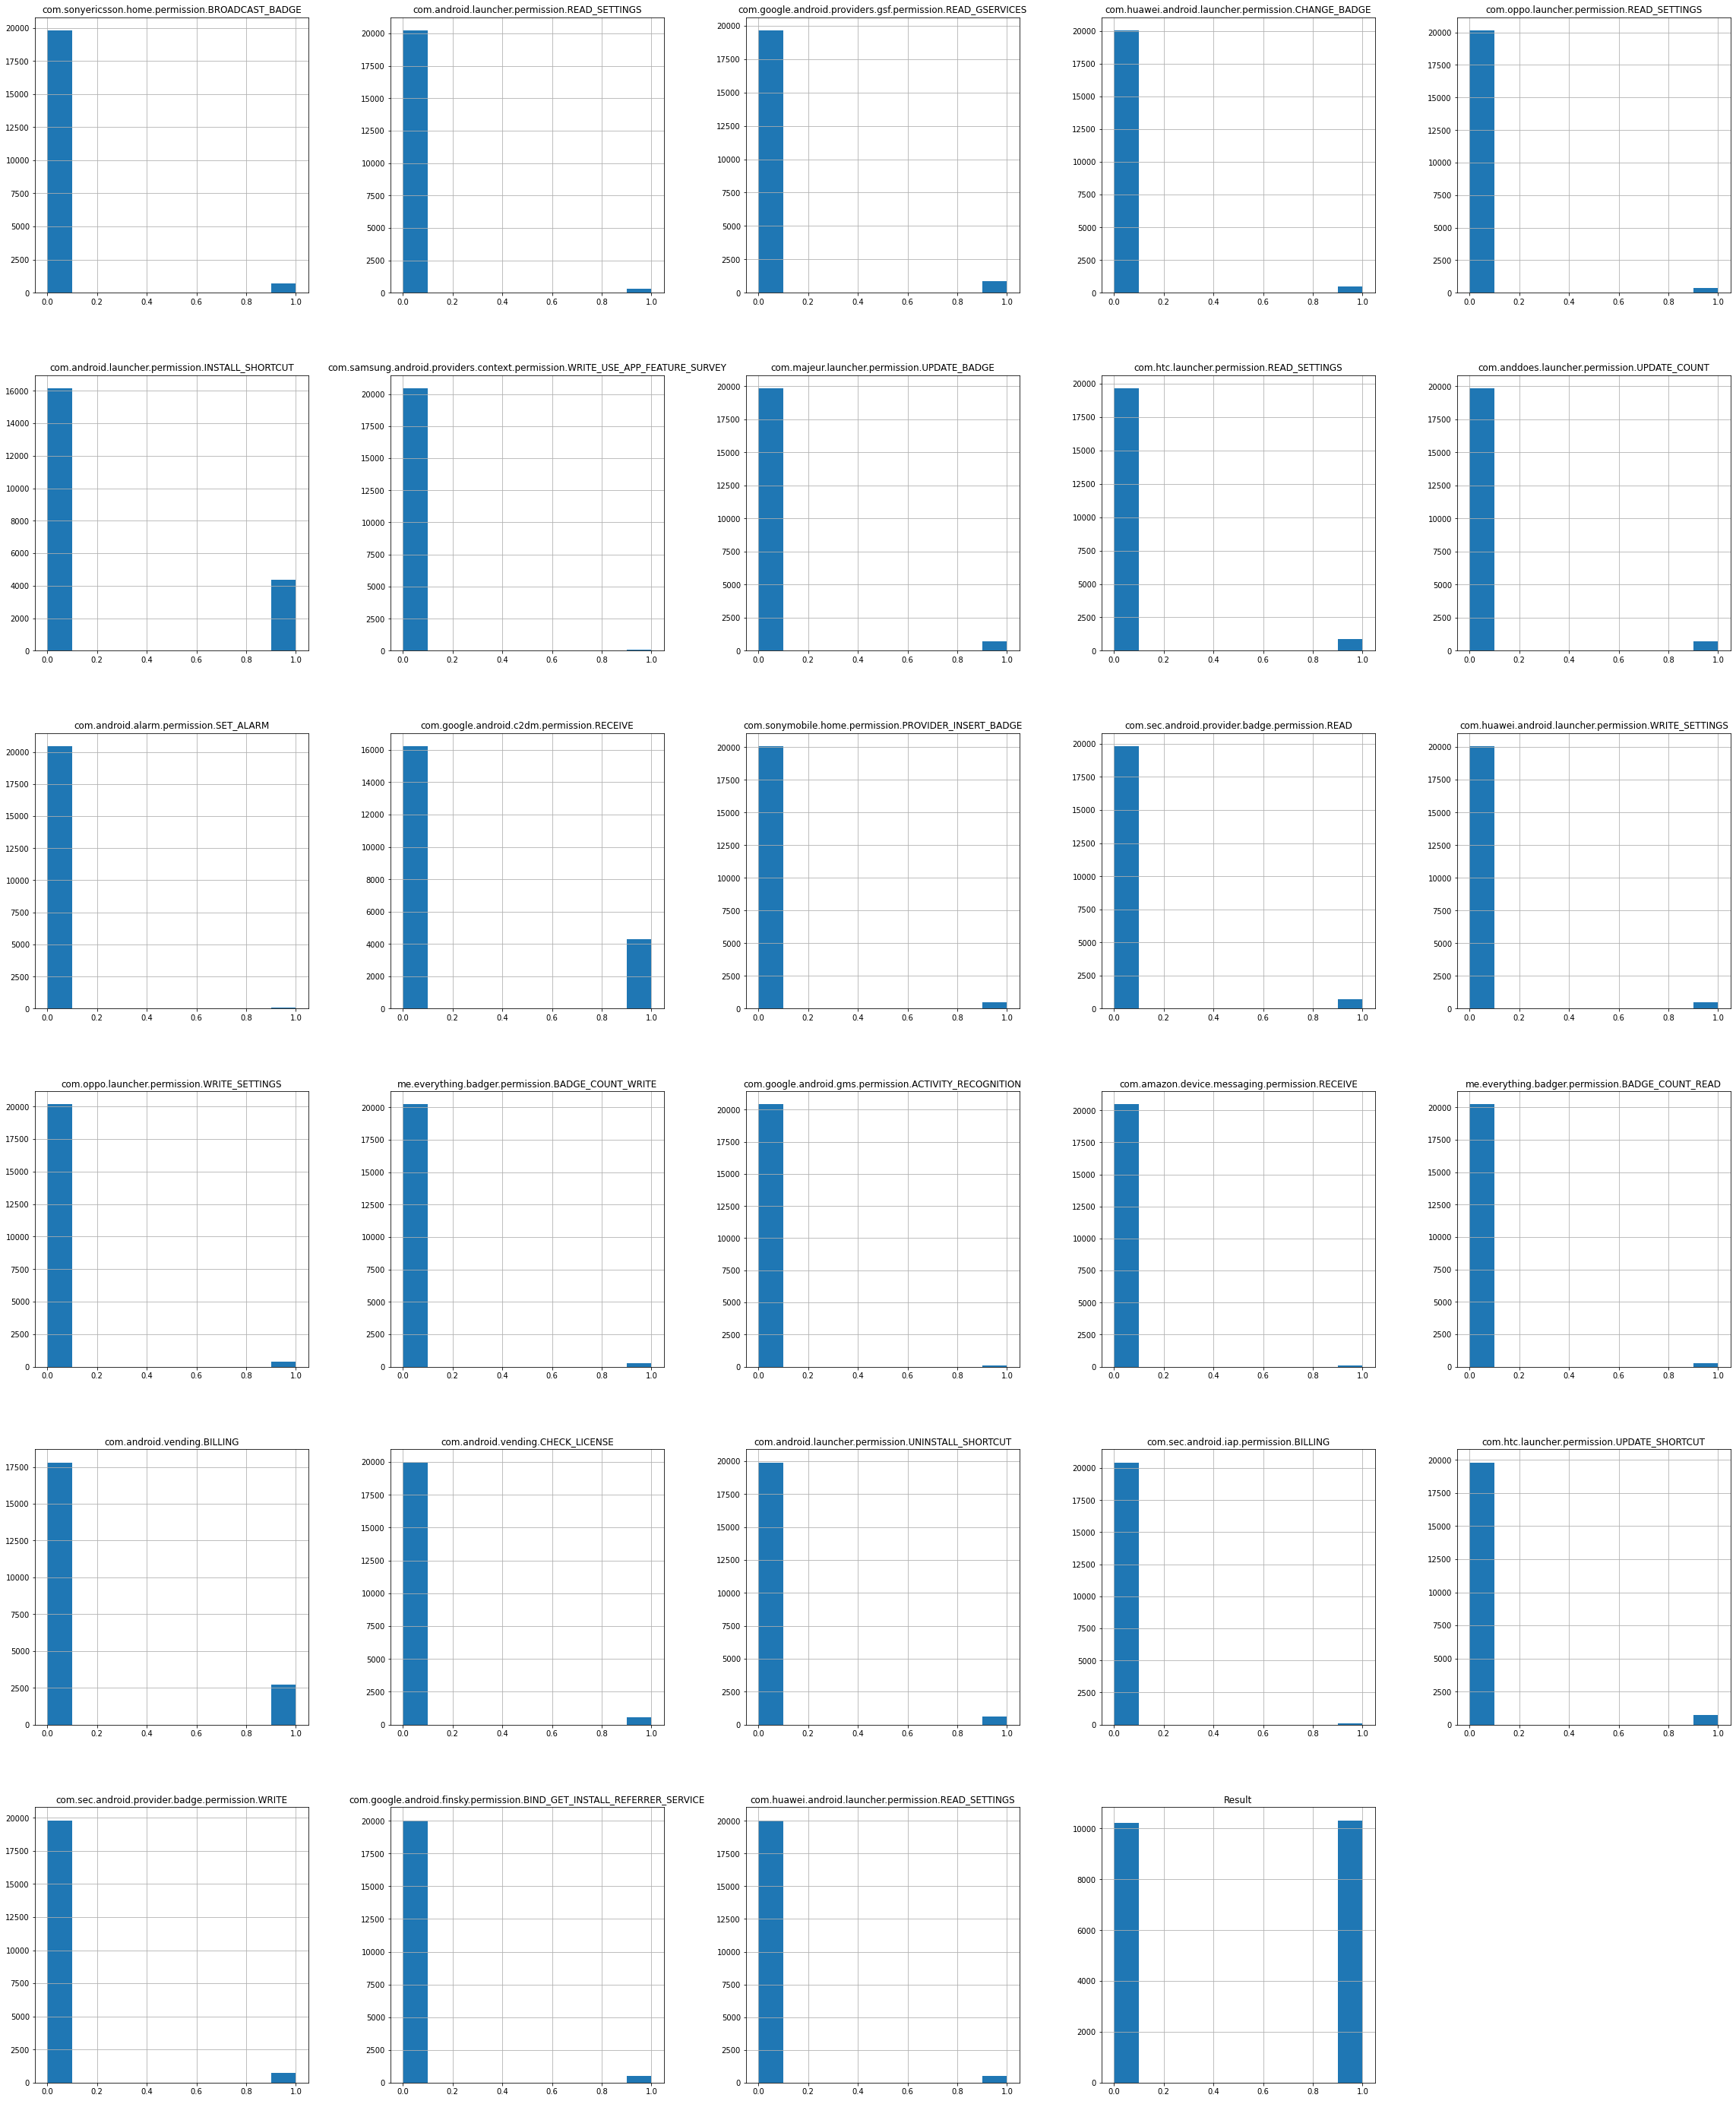

In [ ]:
#Examine distributions of mostly custom permissions
histlist = custom_df.hist(figsize = (40,50))

In [ ]:
# Segregate native filers based on names that start with "android"
native = train.filter(regex = "^android|Result").columns
native

Index(['android.permission.GET_ACCOUNTS', 'android.permission.READ_PROFILE',
       'android.permission.MANAGE_ACCOUNTS',
       'android.permission.WRITE_SYNC_SETTINGS',
       'android.permission.READ_EXTERNAL_STORAGE',
       'android.permission.RECEIVE_SMS', 'android.permission.WRITE_SETTINGS',
       'android.permission.DOWNLOAD_WITHOUT_NOTIFICATION',
       'android.permission.GET_TASKS',
       'android.permission.WRITE_EXTERNAL_STORAGE',
       'android.permission.RECORD_AUDIO',
       'android.permission.CHANGE_NETWORK_STATE',
       'android.permission.android.permission.READ_PHONE_STATE',
       'android.permission.CALL_PHONE', 'android.permission.WRITE_CONTACTS',
       'android.permission.READ_PHONE_STATE',
       'android.permission.MODIFY_AUDIO_SETTINGS',
       'android.permission.ACCESS_LOCATION_EXTRA_COMMANDS',
       'android.permission.INTERNET',
       'android.permission.MOUNT_UNMOUNT_FILESYSTEMS',
       'android.permission.AUTHENTICATE_ACCOUNTS',
       'android

In [ ]:
# Create a numeric dataframe
native_df = pd.DataFrame()

# Import customer permission features from X_train (contain com. in name)
native_df[native] = train[native]

In [ ]:
# Segregate observations identified as malware
malware_native = native_df.loc[native_df['Result'] == 1]
# Find the sum/frequency of each permission's ocurrence for malware (0=permission not used in malware observations)
malware_native.sum().sort_values(ascending=False)

Result                                                    10319
android.permission.INTERNET                                9996
android.permission.ACCESS_NETWORK_STATE                    9882
android.permission.READ_PHONE_STATE                        9721
android.permission.WRITE_EXTERNAL_STORAGE                  7593
android.permission.RECEIVE_BOOT_COMPLETED                  7242
android.permission.ACCESS_COARSE_LOCATION                  7018
android.permission.ACCESS_FINE_LOCATION                    6709
android.permission.ACCESS_WIFI_STATE                       6460
android.permission.WAKE_LOCK                               4750
android.permission.GET_TASKS                               4140
android.permission.VIBRATE                                 3898
android.permission.SYSTEM_ALERT_WINDOW                     3275
android.permission.GET_ACCOUNTS                            2936
android.permission.READ_CONTACTS                           2067
android.permission.WRITE_SETTINGS       

In [ ]:
# Segregate observations identified as benign
benign_native = native_df.loc[native_df['Result'] == 0]
# Find the sum/frequency of each permissions occurence for benign (0=permission not used in benign observations)
benign_native.sum().sort_values(ascending=False)

android.permission.INTERNET                               10014
android.permission.ACCESS_NETWORK_STATE                    9591
android.permission.WRITE_EXTERNAL_STORAGE                  6210
android.permission.WAKE_LOCK                               5154
android.permission.ACCESS_WIFI_STATE                       4303
android.permission.VIBRATE                                 3336
android.permission.READ_EXTERNAL_STORAGE                   2604
android.permission.ACCESS_COARSE_LOCATION                  2513
android.permission.ACCESS_FINE_LOCATION                    2455
android.permission.READ_PHONE_STATE                        2366
android.permission.RECEIVE_BOOT_COMPLETED                  2131
android.permission.CAMERA                                  1753
android.permission.GET_ACCOUNTS                            1741
android.permission.RECORD_AUDIO                             816
android.permission.GET_TASKS                                711
android.permission.READ_CONTACTS        

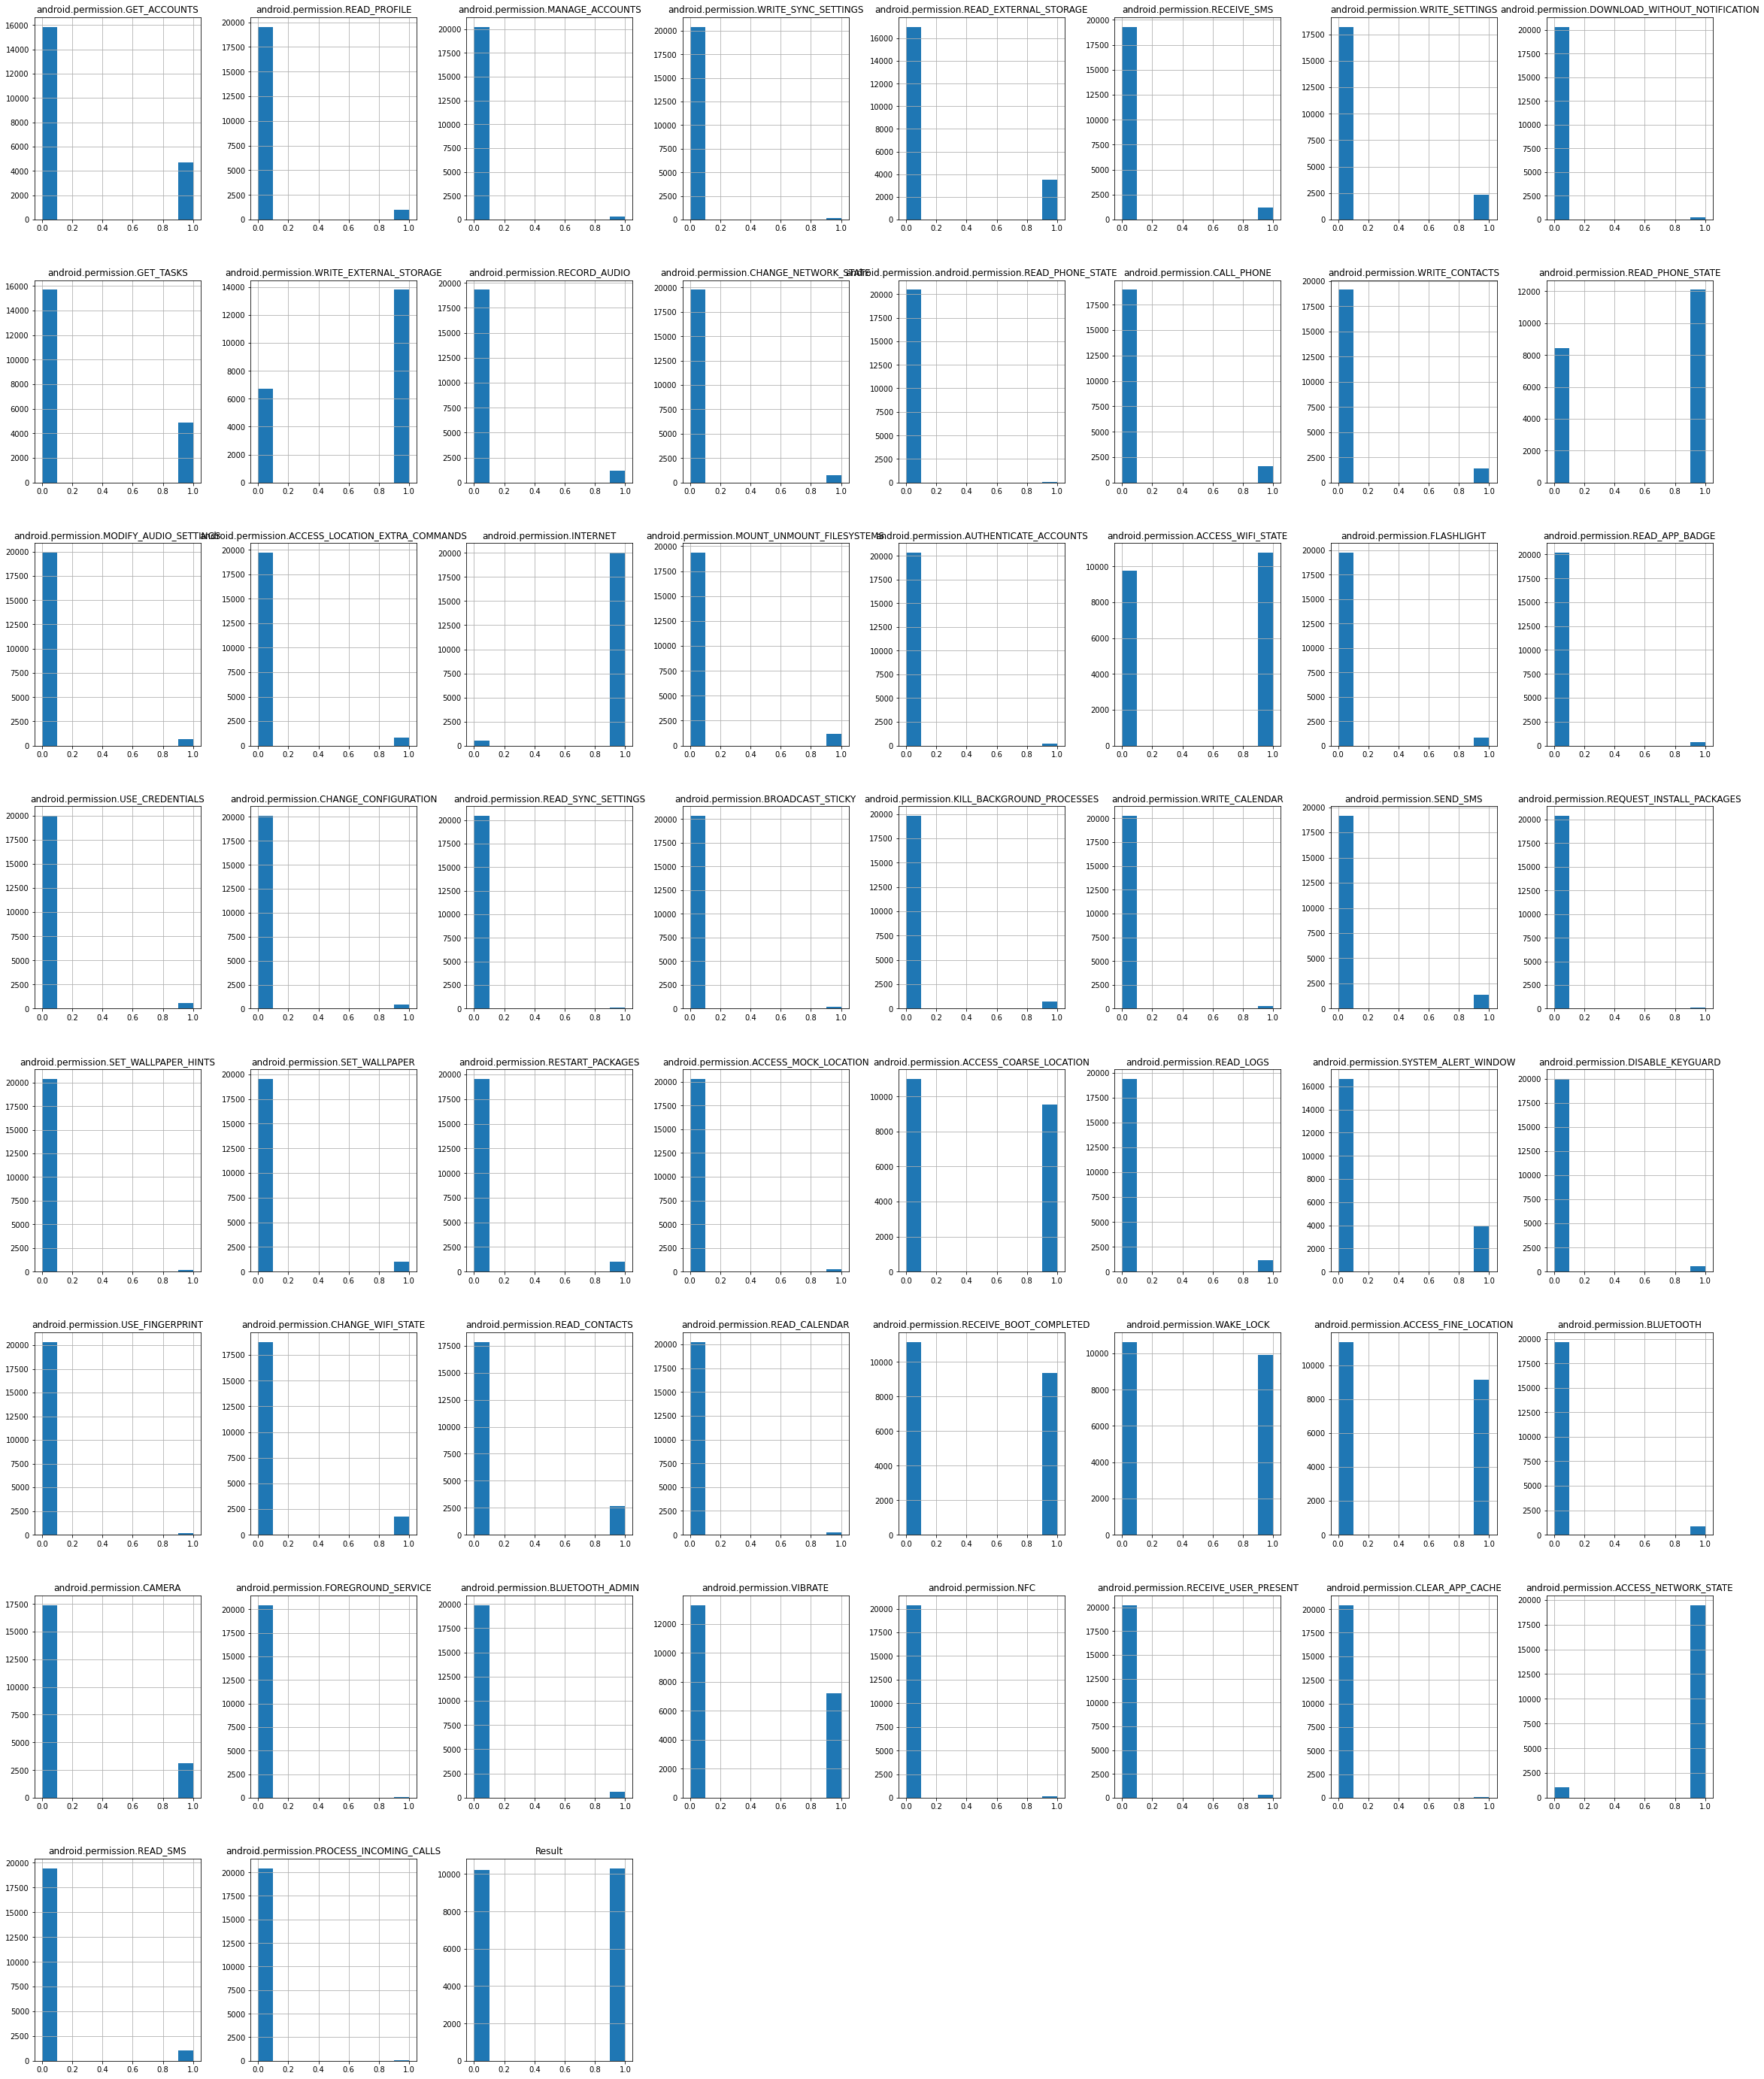

In [ ]:
#Examine distributions of native permissions
histlist = native_df.hist(figsize = (40,50))

In [ ]:
#storing the variance and name of variables

variance = train.var()
columns = train.columns

#saving the names of variables having variance more than a threshold value

variable = [ ]

for i in range(0,len(variance)):
    if variance[i]>=0.006: #setting the threshold as 1%
        variable.append(columns[i])

In [ ]:
len(variable)

76

In [ ]:
# Retain only the non-near zero variance features in train
train_red = train[variable]
# Retain only the non-near zero variance features in test
test_red = test[variable]
train_red.shape

(20532, 76)

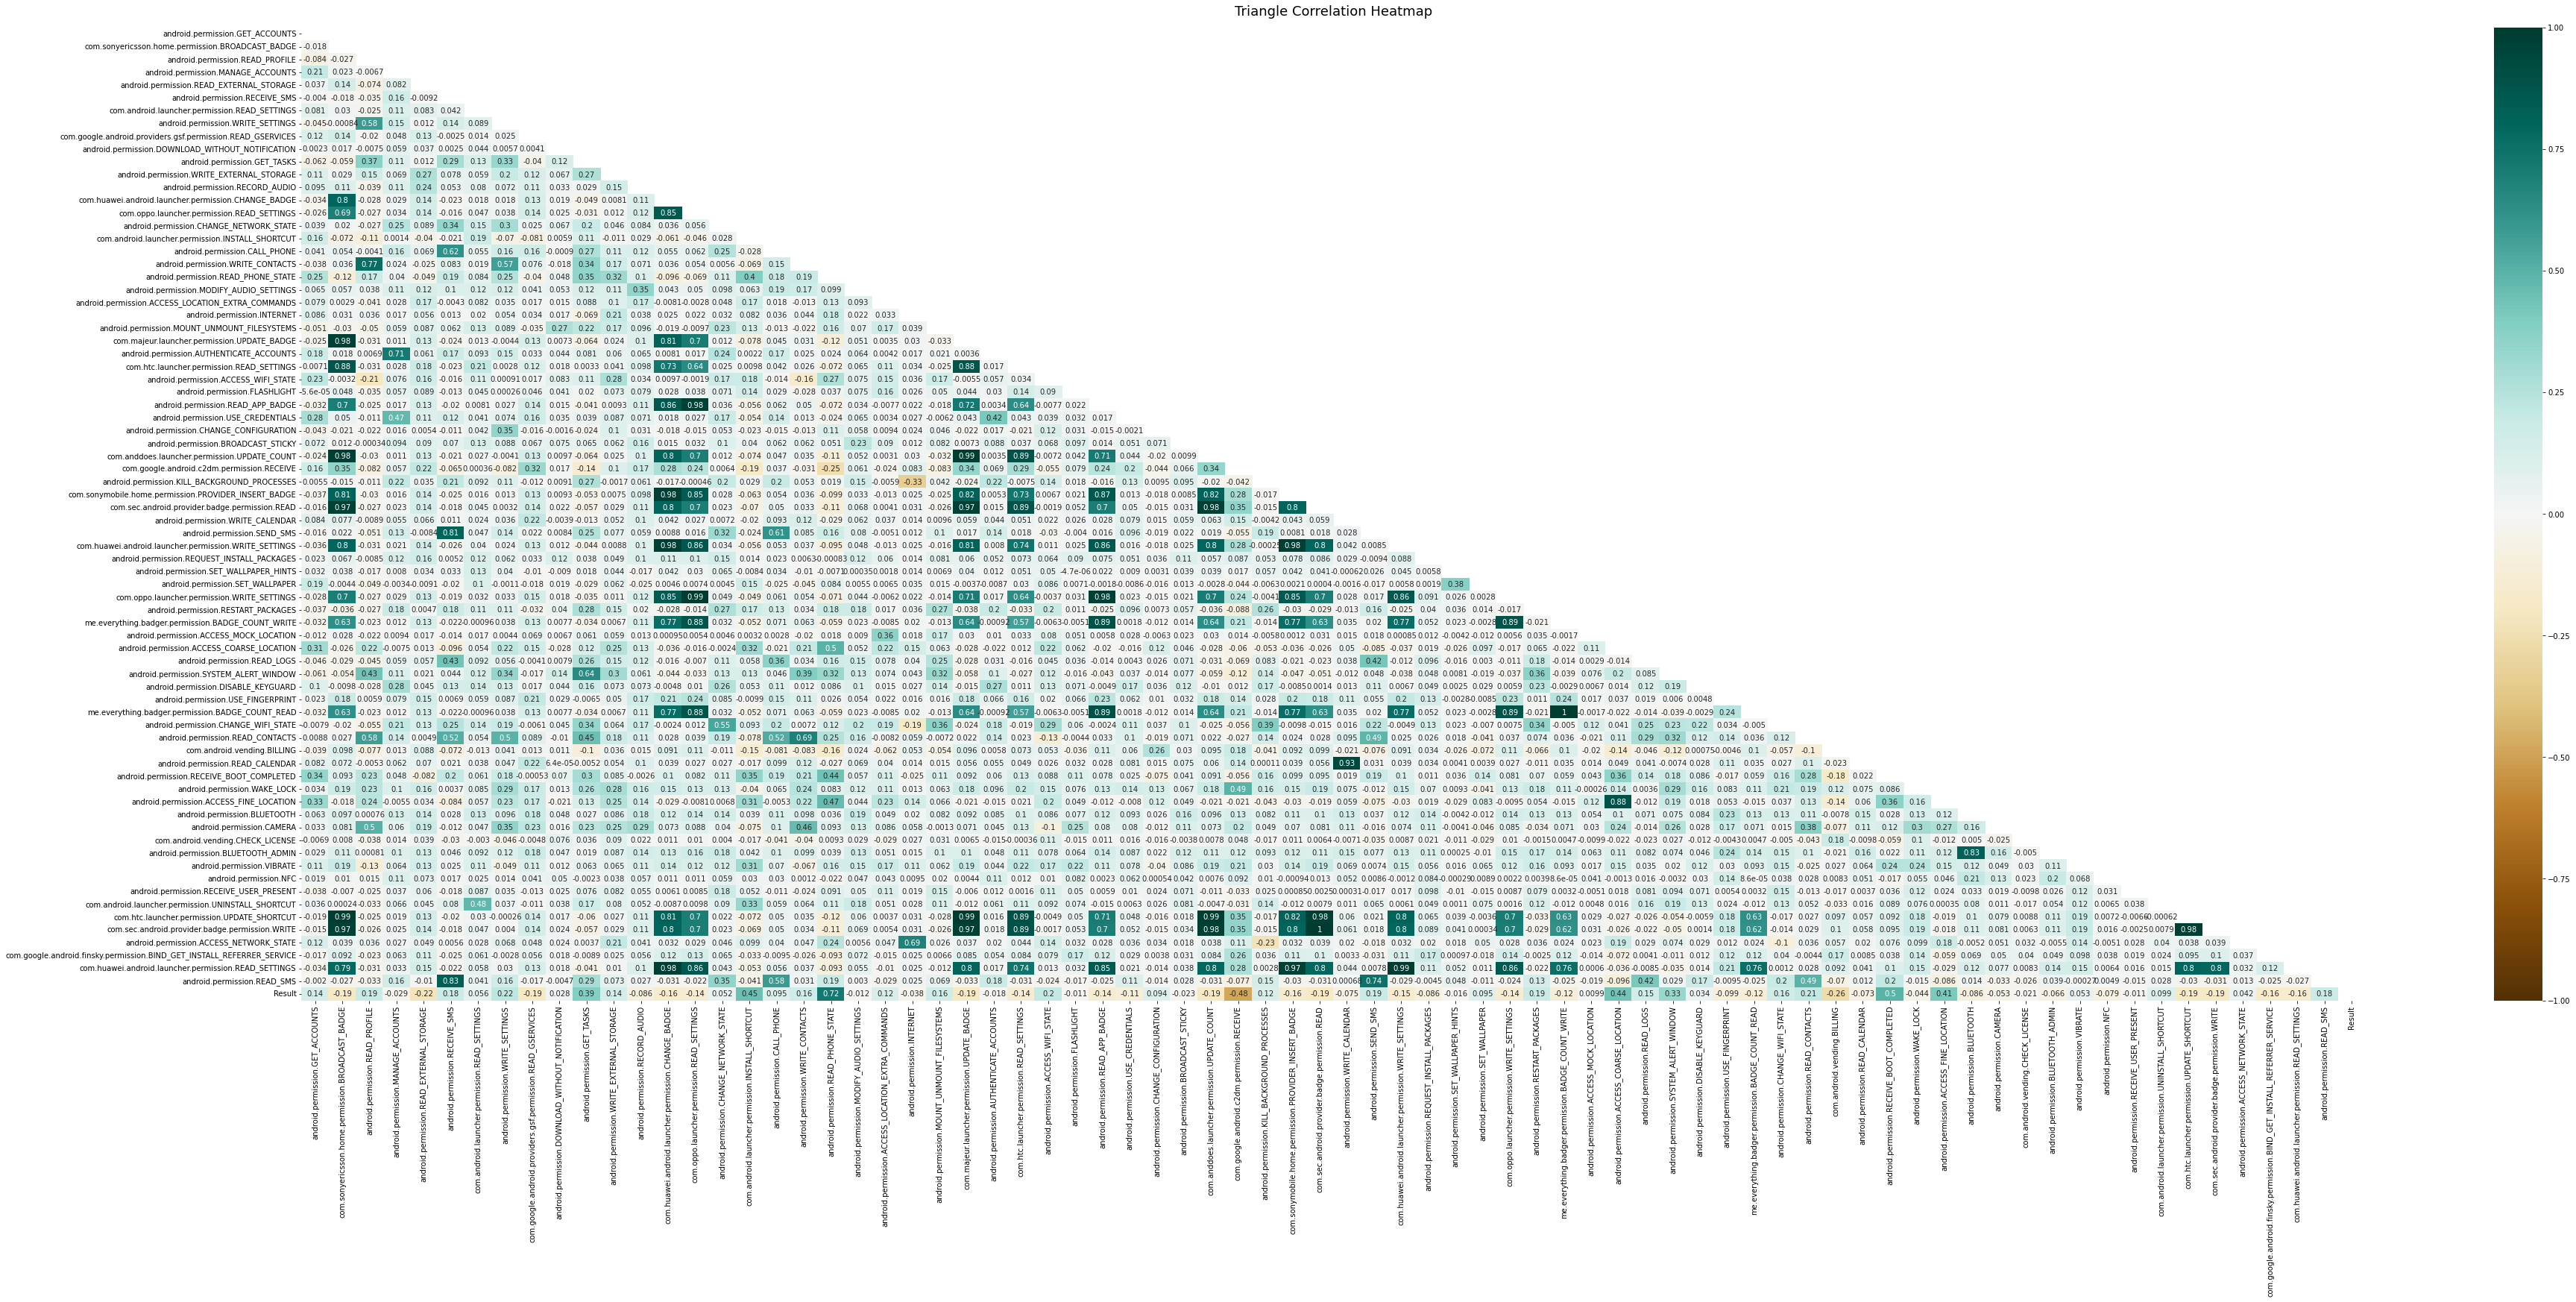

In [ ]:
plt.figure(figsize=(62, 24))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(train_red.corr(), dtype=bool))
heatmap = sns.heatmap(train_red.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [ ]:
# Create correlation matrix
corr_matrix = train_red.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]

# Display features to drop
print(to_drop)

['com.huawei.android.launcher.permission.CHANGE_BADGE', 'com.oppo.launcher.permission.READ_SETTINGS', 'com.majeur.launcher.permission.UPDATE_BADGE', 'com.htc.launcher.permission.READ_SETTINGS', 'android.permission.READ_APP_BADGE', 'com.anddoes.launcher.permission.UPDATE_COUNT', 'com.sonymobile.home.permission.PROVIDER_INSERT_BADGE', 'com.sec.android.provider.badge.permission.READ', 'android.permission.SEND_SMS', 'com.huawei.android.launcher.permission.WRITE_SETTINGS', 'com.oppo.launcher.permission.WRITE_SETTINGS', 'me.everything.badger.permission.BADGE_COUNT_WRITE', 'me.everything.badger.permission.BADGE_COUNT_READ', 'android.permission.READ_CALENDAR', 'android.permission.ACCESS_FINE_LOCATION', 'android.permission.BLUETOOTH_ADMIN', 'com.htc.launcher.permission.UPDATE_SHORTCUT', 'com.sec.android.provider.badge.permission.WRITE', 'com.huawei.android.launcher.permission.READ_SETTINGS', 'android.permission.READ_SMS']


In [ ]:
# Drop highly correlated features
train_red.drop(to_drop, axis=1, inplace=True)
test_red.drop(to_drop, axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


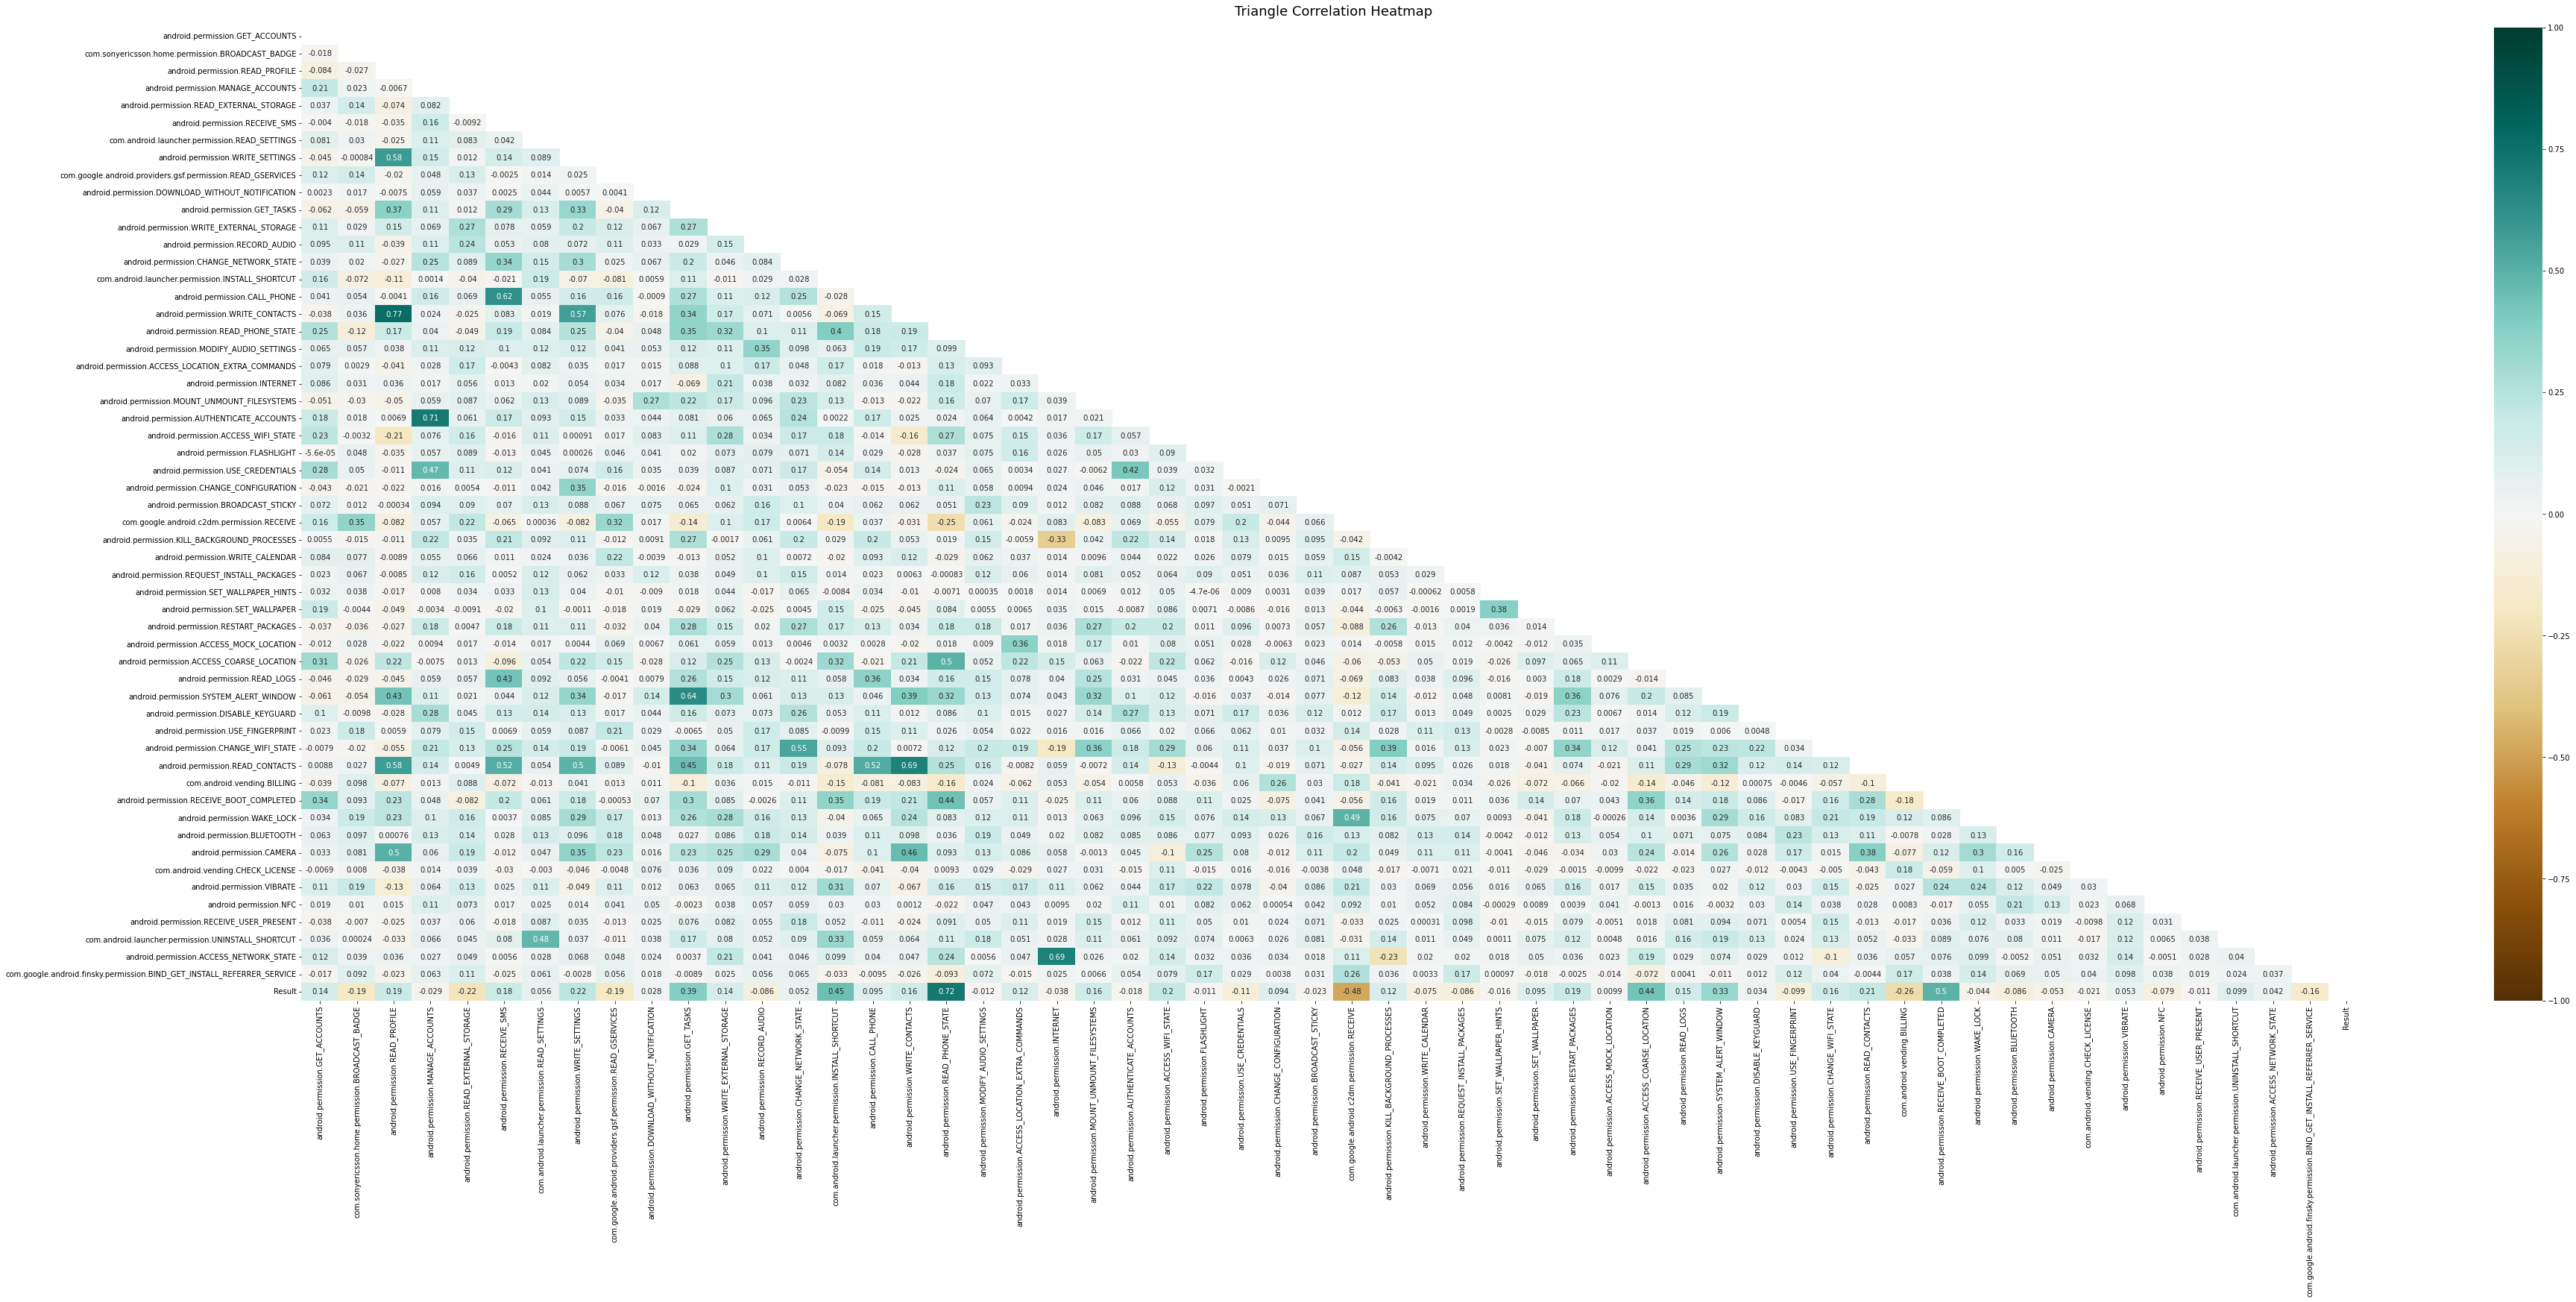

In [ ]:
# Add a second correlation heat map after features have been reduced to show that issues have been reconciled.
plt.figure(figsize=(62, 24))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(train_red.corr(), dtype=bool))
heatmap = sns.heatmap(train_red.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [ ]:
#Split our Train / test sets for X and y

#Define X
select = [x for x in train_red.columns if x != "Result"]
X_train = train_red.loc[:, select]
X_test = test_red.loc[:,select]
#Define y
y_train = train_red['Result']
y_test = test_red['Result']

In [ ]:
k_vals = range(1,56)
results = []
for k in k_vals:
    pipe = make_pipeline(SelectKBest(chi2, k=k), Perceptron(class_weight = 'balanced'))
    model = pipe.fit(X_train, y_train)
    kbest = SelectKBest(chi2, k=k)
    kbest.fit_transform(X_train, y_train)
    
    train_pred = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_pred)
    test_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_pred)
    
    results.append({'k-value': k, 'Training Accuracy': train_acc, 'Test Accuracy':test_acc})

In [ ]:
results_df = pd.DataFrame(results)
#print(results_df.to_string())
print(results_df.sort_values('Test Accuracy', ascending = False).to_string())

    k-value  Training Accuracy  Test Accuracy
53       54           0.950468       0.953182
50       51           0.946961       0.950568
45       46           0.945110       0.949545
44       45           0.942383       0.947045
52       53           0.943698       0.946023
51       52           0.942042       0.945795
48       49           0.942383       0.945795
39       40           0.936100       0.943295
36       37           0.938535       0.942500
42       43           0.938243       0.942386
47       48           0.940873       0.942159
54       55           0.936782       0.941705
14       15           0.934249       0.939773
17       18           0.931960       0.939545
20       21           0.931570       0.938068
13       14           0.930060       0.935341
11       12           0.930012       0.935227
38       39           0.930840       0.935227
27       28           0.930401       0.935000
43       44           0.928989       0.933864
28       29           0.929671    

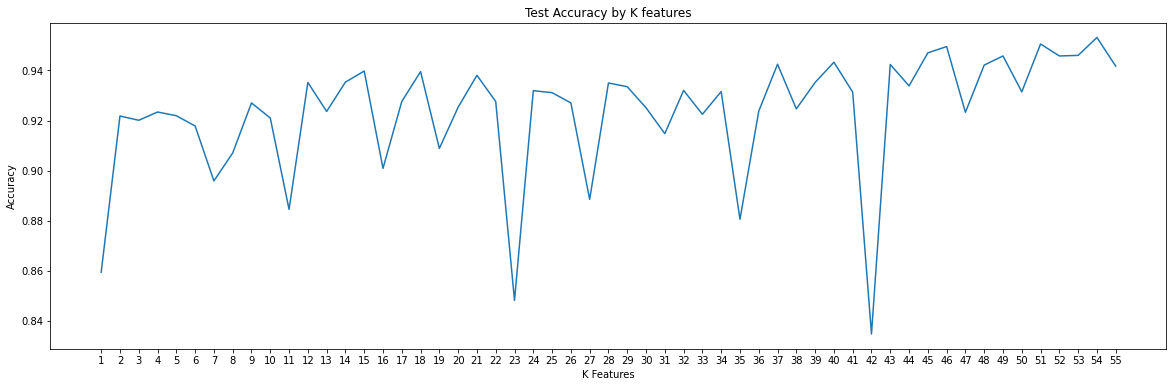

In [ ]:
#Plot it here
x= results_df['k-value']
plt.figure(figsize=(20,6))
plt.plot(results_df['Test Accuracy'])
default_x_ticks = range(len(x))

plt.xticks(default_x_ticks, x)

plt.xlabel('K Features')
plt.ylabel('Accuracy')

plt.title('Test Accuracy by K features')
plt.show()

## Multi Layer Perceptron

### Optimizing Learning Rate | Comparing Adam & SGD Optimizers

In [ ]:

nn_results = []

learn_rate = [0.00001,0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,4]

mod = keras.models.Sequential([
    keras.Input(shape=55),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(1, activation = 'sigmoid')                     
])

mod_adam = keras.models.Sequential([
    keras.Input(shape=55),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(1, activation = 'sigmoid')                     
])

for l in learn_rate:
  # compiling the model using SGD optimizer 
  mod.compile(loss = 'binary_crossentropy', optimizer=keras.optimizers.SGD(learning_rate= l),
            metrics=['accuracy'])
  # compiling the model using Adam optimizer
  mod_adam.compile(loss = 'binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate= l),
            metrics=['accuracy'])

  # To use Sklearn's Cross_val_score, the model must rewrapped in sklearn format
  estimator_1 = KerasClassifier(build_fn = mod, epochs = 10)
  estimator_2 = KerasClassifier(build_fn = mod_adam, epochs = 10)

  # Now that the model has been wrapped, the estimator created can be used
  cv1 = cross_val_score(estimator_1, X_train, y_train, cv=10, n_jobs=2, scoring = 'precision')
  cv2 = cross_val_score(estimator_2, X_train, y_train, cv=10, n_jobs=2, scoring = 'precision')
  

  Train_acc_a = accuracy_score(y_train, np.round(mod_adam.predict(X_train)))
  Test_acc_a = accuracy_score(y_test, np.round(mod_adam.predict(X_test)))

  nn_results.append({'Learning Rate': l, 'SGD Precision': cv1.mean(), 
                     'Adam Precision': cv2.mean()})

In [ ]:
nn_results_df = pd.DataFrame(nn_results)
nn_results_df

Learning Rate  SGD Precision  Adam Precision
0         0.00001       0.560733        0.942411
1         0.00010       0.821958        0.964665
2         0.00050       0.855783        0.971779
3         0.00100       0.918621        0.967966
4         0.00500       0.947014        0.970184
5         0.01000       0.957099        0.968808
6         0.05000       0.971048        0.954459
7         0.10000       0.967979        0.903718
8         0.50000       0.971790        0.584105
9         1.00000       0.964944        0.401755
10        4.00000       0.150779        0.352047

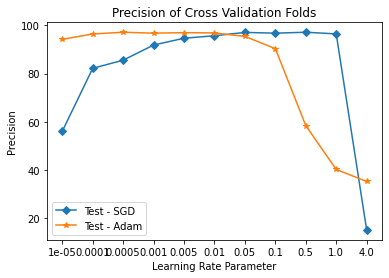

In [ ]:
tick = range(len(nn_results_df['Learning Rate']))
plt.plot(nn_results_df['SGD Precision']*100, marker = 'D', label = 'Test - SGD')
plt.plot(nn_results_df['Adam Precision']*100, marker = '*', label = 'Test - Adam')
plt.xlabel('Learning Rate Parameter')
plt.ylabel('Precision')
plt.title('Precision of Cross Validation Folds')
plt.legend(loc = 'top left')
plt.xticks(ticks=tick, labels=nn_results_df['Learning Rate'])
plt.show()

The Adaptive Movement Estimation Algorithm (Adam) offered the best performance with an accuracy of over 96% at a learning rate of 0.005. 

Adam is an extension of gradient descent that builds on the ideas of AdaGrad.
Adam automatically updates the learning rate by exponentially decreasing the moving average. 

### Tuning Epsilon for Adam Classifier

In [ ]:
epsilons = [0.000005, 0.00001, 0.00005, 0.0001, 0.0005,0.001,0.01,0.1,1]
eps_results = []

modad = keras.models.Sequential([
    keras.Input(shape=55),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(1, activation = 'sigmoid')                     
])
for e in epsilons:
  modad.compile(loss = 'binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate = 0.0005, epsilon = e),metrics=['accuracy'])
  estimator_a = KerasClassifier(build_fn = modad, epochs = 10)

  cva = cross_val_score(estimator_a, X_train, y_train, cv=10, n_jobs=2, scoring = 'precision')
  eps_results.append({'Epsilon': e, 'Precision': cva.mean()})

In [ ]:
eps_results_df = pd.DataFrame(eps_results)
eps_results_df

Epsilon  Precision
0  0.000005   0.969864
1  0.000010   0.971741
2  0.000050   0.970198
3  0.000100   0.966301
4  0.000500   0.971218
5  0.001000   0.967578
6  0.010000   0.964222
7  0.100000   0.946426
8  1.000000   0.901827

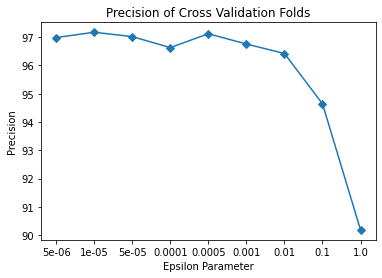

In [ ]:
tick = range(len(eps_results_df['Epsilon']))
plt.plot(eps_results_df['Precision']*100, marker = 'D')
plt.xlabel('Epsilon Parameter')
plt.ylabel('Precision')
plt.title('Precision of Cross Validation Folds')
plt.xticks(ticks=tick, labels=eps_results_df['Epsilon'])
plt.show()

The epsilon parameter for adam of 0.0005 offered the best accuracy over the cross validation. Keras cites epsilon as being a hyperparameter for optimizing numerical stability.

### Tuning the Epochs

In [ ]:
epoch = range(1,26)

epoch_results = []

epochMLP = keras.models.Sequential([
    keras.Input(shape=55),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(1, activation = 'sigmoid')                     
])


for e in epoch:
  epochMLP.compile(loss = 'binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate = 0.0005, epsilon = 0.001),metrics=['accuracy'])
  estimator_ep = KerasClassifier(build_fn = epochMLP, epochs = e)

  cva = cross_val_score(estimator_ep, X_train, y_train, cv=10, n_jobs=2, scoring = 'precision')
  epoch_results.append({'Epochs': e, 'Precision': cva.mean()})

In [ ]:
epoch_results_df = pd.DataFrame(epoch_results)

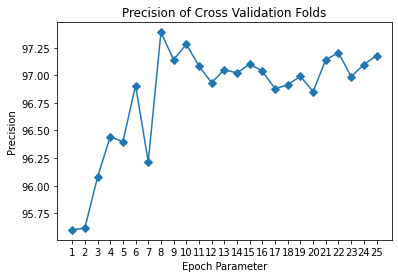

In [ ]:
tick = range(len(epoch_results_df['Epochs']))
plt.plot(epoch_results_df['Precision']*100, marker = 'D')
plt.xlabel('Epoch Parameter')
plt.ylabel('Precision')
plt.title('Precision of Cross Validation Folds')
plt.xticks(ticks=tick, labels=epoch_results_df['Epochs'])
plt.show()

The optimal epoch was found to be 8 epochs. Epochs essentially is manually deciding how many times the model should iterate through the data. Too few of epochs and the neural network's weights will be under tuned causing underfit, too many epochs and the model will be extremely overfit. 

### Final MLP Model & Metrics

After evaluating the MLP parameters using 10 fold cross validation to fine tune the model based on precision to accurately predict as many Malware applications as possible. 

In [ ]:
finalMLP = keras.models.Sequential([
    keras.Input(shape=55),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(1, activation = 'sigmoid')                     
])

finalMLP.compile(loss = 'binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate = 0.0005,epsilon = 0.001),metrics=['accuracy'])

finalMLP.fit(X_train, y_train, epochs = 8)

pred_finalMLP = np.round(finalMLP.predict(X_test))

Epoch 1/8
642/642 [==============================] - 3s 3ms/step - loss: 0.2233 - accuracy: 0.9192
Epoch 2/8
642/642 [==============================] - 2s 3ms/step - loss: 0.1245 - accuracy: 0.9581
Epoch 3/8
642/642 [==============================] - 2s 3ms/step - loss: 0.1141 - accuracy: 0.9623
Epoch 4/8
642/642 [==============================] - 2s 3ms/step - loss: 0.1078 - accuracy: 0.9642
Epoch 5/8
642/642 [==============================] - 2s 3ms/step - loss: 0.1029 - accuracy: 0.9647
Epoch 6/8
642/642 [==============================] - 2s 3ms/step - loss: 0.0991 - accuracy: 0.9663
Epoch 7/8
642/642 [==============================] - 2s 3ms/step - loss: 0.0955 - accuracy: 0.9672
Epoch 8/8
642/642 [==============================] - 2s 3ms/step - loss: 0.0938 - accuracy: 0.9686


In [ ]:
mlp_acc = accuracy_score(y_test, pred_finalMLP)
mlp_prec = metrics.precision_score(y_test, pred_finalMLP)
mlp_rec = metrics.recall_score(y_test, pred_finalMLP)
mlp_f1 = metrics.f1_score(y_test, pred_finalMLP)


print(accuracy_score(y_test, pred_finalMLP))
print(metrics.precision_score(y_test, pred_finalMLP))

0.9647727272727272
0.9680386295700161


#### MLP Confusion Matrix

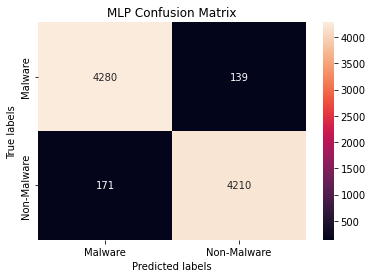

In [ ]:
mlp_cm = confusion_matrix(y_test, pred_finalMLP, labels = [0,1])


ax = plt.subplot()
sns.heatmap(mlp_cm, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('MLP Confusion Matrix')
ax.xaxis.set_ticklabels(['Malware', 'Non-Malware'])
ax.yaxis.set_ticklabels(['Malware', 'Non-Malware'])
plt.show()

The model is still giving pretty good overall accuracy performance. Considering the size of the test set, nearly 9,000 records, 117 missed classes for the Malware class is fairly decent, but using class weights could improve the precision even further. 

#### MLP ROC Curve

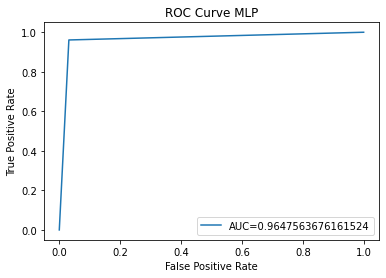

In [ ]:
mlpfalsepr, mlptruepr, _ = metrics.roc_curve(y_test,  pred_finalMLP)
mlpauc = metrics.roc_auc_score(y_test, pred_finalMLP)

plt.plot(mlpfalsepr,mlptruepr,label="AUC="+str(mlpauc))
plt.title('ROC Curve MLP')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()


### Weighted MLP

In order to optimize precision even further, although our classes are balanced, class weights can be used when one is more important to solving a business problem than the other. Doing so will likely sacrifice some of the overall accuracy of the model while striving to classify as many malware programs as possible correctly. 

In [ ]:
weight = [{0:0.5,1:0.5},{0:0.6,1:0.4},{0:0.7,1:0.3},{0:0.75,1:0.25},{0:0.8,1:0.2},
          {0:0.85,1:0.15},{0:0.9,1:0.1},{0:0.95,1:0.05}]

In [ ]:
wmlp_results = []

weightMLP = keras.models.Sequential([
    keras.Input(shape=55),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(1, activation = 'sigmoid')                     
])


for w in weight:
  weightMLP.compile(loss = 'binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate = 0.0005,epsilon = 0.001),metrics=['accuracy'])
  estimator_w = KerasClassifier(build_fn = weightMLP, epochs = 8, class_weight = w)

  cvw = cross_val_score(estimator_w, X_train, y_train, cv=10, n_jobs=2, scoring = 'precision')
  wmlp_results.append({'Weight': w, 'Precision': cvw.mean()})

In [ ]:
wmlp_results_df = pd.DataFrame(wmlp_results)
wmlp_results

[{'Precision': 0.9653610804672631, 'Weight': {0: 0.5, 1: 0.5}},
 {'Precision': 0.9718204475312255, 'Weight': {0: 0.6, 1: 0.4}},
 {'Precision': 0.9776464594496534, 'Weight': {0: 0.7, 1: 0.3}},
 {'Precision': 0.9845854892068013, 'Weight': {0: 0.75, 1: 0.25}},
 {'Precision': 0.9828716776959432, 'Weight': {0: 0.8, 1: 0.2}},
 {'Precision': 0.9877217984149975, 'Weight': {0: 0.85, 1: 0.15}},
 {'Precision': 0.992389140670114, 'Weight': {0: 0.9, 1: 0.1}},
 {'Precision': 0.9942047871099934, 'Weight': {0: 0.95, 1: 0.05}}]

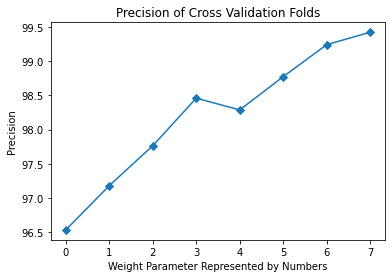

In [ ]:
tick = range(len(wmlp_results_df['Weight']))
plt.plot(wmlp_results_df['Precision']*100, marker = 'D')
plt.xlabel('Weight Parameter Represented by Numbers')
plt.ylabel('Precision')
plt.title('Precision of Cross Validation Folds')
plt.xticks(ticks=tick)
plt.show()

The precision is best optimized for 0.95 malware class, 0.05 non-malware weighting. 

In [ ]:
finalwMLP = keras.models.Sequential([
    keras.Input(shape=55),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(1, activation = 'sigmoid')                     
])

finalwMLP.compile(loss = 'binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate = 0.0005,epsilon = 0.001),metrics=['accuracy'])

finalwMLP.fit(X_train, y_train, epochs = 8, class_weight = {0: 0.95, 1: 0.05})

pred_finalwMLP = np.round(finalwMLP.predict(X_test))

Epoch 1/8
642/642 [==============================] - 5s 5ms/step - loss: 0.0767 - accuracy: 0.6149
Epoch 2/8
642/642 [==============================] - 3s 5ms/step - loss: 0.0251 - accuracy: 0.8855
Epoch 3/8
642/642 [==============================] - 3s 5ms/step - loss: 0.0220 - accuracy: 0.9042
Epoch 4/8
642/642 [==============================] - 3s 5ms/step - loss: 0.0204 - accuracy: 0.9108
Epoch 5/8
642/642 [==============================] - 4s 7ms/step - loss: 0.0193 - accuracy: 0.9131
Epoch 6/8
642/642 [==============================] - 4s 6ms/step - loss: 0.0183 - accuracy: 0.9171
Epoch 7/8
642/642 [==============================] - 4s 6ms/step - loss: 0.0174 - accuracy: 0.9196
Epoch 8/8
642/642 [==============================] - 4s 6ms/step - loss: 0.0165 - accuracy: 0.9247


In [ ]:
w_mlp_acc = accuracy_score(y_test, pred_finalwMLP)
w_mlp_prec = metrics.precision_score(y_test, pred_finalwMLP)
w_mlp_rec = metrics.recall_score(y_test, pred_finalwMLP)
w_mlp_f1 = metrics.f1_score(y_test, pred_finalwMLP)

print(accuracy_score(y_test, pred_finalwMLP))
print(metrics.precision_score(y_test, pred_finalwMLP))

0.92
0.995152168058174


#### Weighted MLP Confusion Matrix

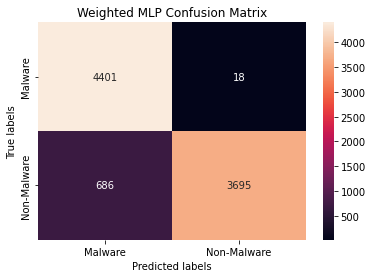

In [ ]:
mlpw_cm = confusion_matrix(y_test, pred_finalwMLP, labels = [0,1])


ax = plt.subplot()
sns.heatmap(mlpw_cm, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Weighted MLP Confusion Matrix')
ax.xaxis.set_ticklabels(['Malware', 'Non-Malware'])
ax.yaxis.set_ticklabels(['Malware', 'Non-Malware'])
plt.show()

While the model does only have 6 miss classifications on the malware class, it does come at the cost of flagging many legitimate applications as malware. In a real business setting, the financial cost of flagging that many legitimate applications as malware would have to taken into account. This could potentially flag the application for the smartphone user to decide whether yes, they would like to continue the download, or no, they think the application might be risky as a computer defense application would. 

#### Weighted MLP ROC Curve

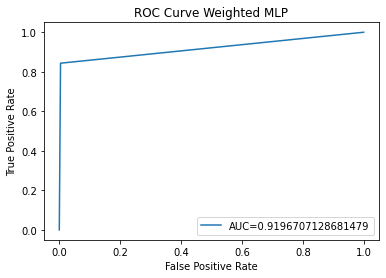

In [ ]:
mlpwfalsepr, mlpwtruepr, _ = metrics.roc_curve(y_test,  pred_finalwMLP)
mlpwauc = metrics.roc_auc_score(y_test, pred_finalwMLP)

plt.plot(mlpwfalsepr,mlpwtruepr,label="AUC="+str(mlpwauc))
plt.title('ROC Curve Weighted MLP')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## SVM

In [ ]:
from sklearn.svm import SVC

#### SVM Kernel Tuning with Cost

In [ ]:
cost = [0.01,0.05,0.1,0.5,1,3,5,10,15,20]
svm_results = []
for c in cost:
  # iterating over each kernel with different costs
  svmline = SVC(C = c, kernel = 'linear',random_state=3).fit(X_train, y_train)
  svmpoly = SVC(C = c, kernel = 'poly',random_state=3).fit(X_train, y_train)
  svmrbf = SVC(C = c, kernel = 'rbf',random_state=3).fit(X_train, y_train)
  svmsig = SVC(C = c, kernel = 'sigmoid',random_state=3).fit(X_train, y_train)

  # iterating over cross validation scoring
  svmlcv = cross_val_score(svmline, X_train, y_train, cv = 10, n_jobs = 2, scoring = 'precision')
  svmpcv = cross_val_score(svmpoly, X_train, y_train, cv = 10, n_jobs = 2, scoring = 'precision')
  svmrcv = cross_val_score(svmrbf, X_train, y_train, cv = 10, n_jobs = 2, scoring = 'precision')
  svmscv = cross_val_score(svmsig, X_train, y_train, cv = 10, n_jobs = 2, scoring = 'precision')
  svm_results.append({'Cost': c, 'Linear Precision': svmlcv.mean(),
                      'Polynomial Precision': svmpcv.mean(), 'RBF Precision': svmrcv.mean(),
                      'Sigmoid Precision': svmscv.mean()})


In [ ]:
svm_results_df = pd.DataFrame(svm_results)
svm_results_df

Cost  Linear Precision  Polynomial Precision  RBF Precision  \
0   0.01          0.935719              0.955553       0.915598   
1   0.05          0.942949              0.951068       0.940790   
2   0.10          0.948400              0.953966       0.951712   
3   0.50          0.950803              0.962679       0.962147   
4   1.00          0.950713              0.964391       0.963925   
5   3.00          0.950768              0.965357       0.966906   
6   5.00          0.950849              0.965370       0.967190   
7  10.00          0.950854              0.964048       0.968378   
8  15.00          0.950844              0.965954       0.969591   
9  20.00          0.950846              0.967238       0.969568   

   Sigmoid Precision  
0           0.881399  
1           0.894696  
2           0.884924  
3           0.874653  
4           0.874391  
5           0.869976  
6           0.869523  
7           0.868829  
8           0.868903  
9           0.868728

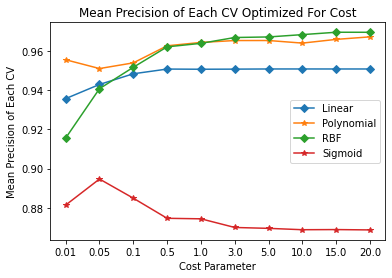

In [ ]:
tick = range(len(svm_results_df['Cost']))
plt.plot(svm_results_df['Linear Precision'], marker = 'D', label = 'Linear')
plt.plot(svm_results_df['Polynomial Precision'], marker = '*', label = 'Polynomial')
plt.plot(svm_results_df['RBF Precision'], marker = 'D', label = 'RBF')
plt.plot(svm_results_df['Sigmoid Precision'], marker = '*', label = 'Sigmoid')
plt.xlabel('Cost Parameter')
plt.ylabel('Mean Precision of Each CV')
plt.title('Mean Precision of Each CV Optimized For Cost')
plt.legend(loc = 'top left')
plt.xticks(ticks=tick, labels=svm_results_df['Cost'])
plt.show()

#### SVM Cost Tuning For RBF

In order to save time training the models for tuning to get a more precise cost, a new training loop has been creating below for the Kernel of choice in this instance, RBF, as it offered the best precision above. The RBF kernel uses distance to compute similarity. 

The cost parameter of the SVM regularizes the data within the algorithm. The higher the cost, the greater the regularization.

In [ ]:
costs = [15,15.5,16,16.5,16.75,17,17.25,17.5,20,21,22]

Crbf_results = []

for c in costs:
  costtune = SVC(C= c, kernel = 'rbf',random_state=3).fit(X_train,y_train)
  costcv = cross_val_score(costtune, X_train, y_train, n_jobs=2, cv=10, scoring='precision')
  Crbf_results.append({'Cost': c,'Precision': costcv.mean()})

In [ ]:
Crbf_results_df = pd.DataFrame(Crbf_results)
Crbf_results_df

Cost  Precision
0   15.00   0.969591
1   15.50   0.969590
2   16.00   0.969500
3   16.50   0.970147
4   16.75   0.970147
5   17.00   0.970147
6   17.25   0.970048
7   17.50   0.970051
8   20.00   0.969568
9   21.00   0.969665
10  22.00   0.969659

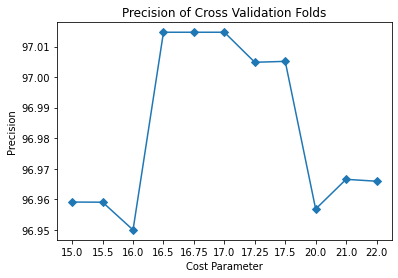

In [ ]:
tick = range(len(Crbf_results_df['Cost']))
plt.plot(Crbf_results_df['Precision']*100, marker = 'D')
plt.xlabel('Cost Parameter')
plt.ylabel('Precision')
plt.title('Precision of Cross Validation Folds')
plt.xticks(ticks=tick, labels=Crbf_results_df['Cost'])
plt.show()

Due to the time constraints when training an SVM, further fine tuning of the cost parameter was done on the kernel of choice RBF. The fine tune revealed that a cost parameter of 17 offered the best precision over the cross validation.

### RBF Gamma Tuning

In [ ]:
gammas = [0.001,0.01,0.1,0.15,0.19,0.2,0.21,0.25,0.3,0.35]

gamsvm_results = []

for g in gammas:
  gammatune = SVC(C= 17, gamma=g, kernel = 'rbf',random_state=3).fit(X_train,y_train)
  gammacv = cross_val_score(gammatune, X_train, y_train, n_jobs=2, cv=10, scoring='precision')
  gamsvm_results.append({'Gamma': g,'Precision': gammacv.mean()})

In [ ]:
gamsvm_results_df = pd.DataFrame(gamsvm_results)
gamsvm_results_df

Gamma  Precision
0  0.001   0.941667
1  0.010   0.953930
2  0.100   0.966423
3  0.150   0.969574
4  0.190   0.970246
5  0.200   0.970141
6  0.210   0.970519
7  0.250   0.969757
8  0.300   0.970280
9  0.350   0.970630

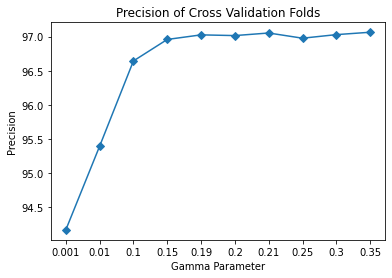

In [ ]:
tick = range(len(gamsvm_results_df['Gamma']))
plt.plot(gamsvm_results_df['Precision']*100, marker = 'D')
plt.xlabel('Gamma Parameter')
plt.ylabel('Precision')
plt.title('Precision of Cross Validation Folds')
plt.xticks(ticks=tick, labels=gamsvm_results_df['Gamma'])
plt.show()

The gamma of the RBF kerel controls the spread of the decision boundaries. The lower the number, the wider the boundary. 0.35 proved to have the highest precision across the cross validation folds. 

### Final SVM Model

In [ ]:
final_svm = SVC(C = 17, gamma=0.35, kernel = 'rbf',random_state=3).fit(X_train, y_train)
svm_pred = final_svm.predict(X_test)

In [ ]:
svm_acc = accuracy_score(y_test, svm_pred)
svm_prec = metrics.precision_score(y_test, svm_pred)
svm_rec = metrics.recall_score(y_test, svm_pred)
svm_f1 = metrics.f1_score(y_test, svm_pred)

print(accuracy_score(y_test, svm_pred))
print(metrics.precision_score(y_test, svm_pred))

0.9676136363636364
0.9714548802946593


#### Confusion Matrix

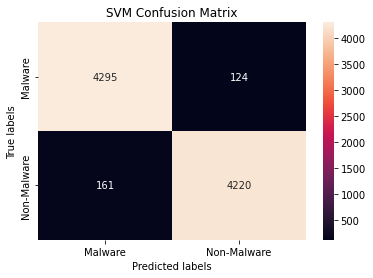

In [ ]:
svm_cm = confusion_matrix(y_test, svm_pred, labels = [0,1])


ax = plt.subplot()
sns.heatmap(svm_cm, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('SVM Confusion Matrix')
ax.xaxis.set_ticklabels(['Malware', 'Non-Malware'])
ax.yaxis.set_ticklabels(['Malware', 'Non-Malware'])
plt.show()

Compared to the weighted model, this confusion matrix has more overall accuracy as the recall is improved. 

#### ROC Curve

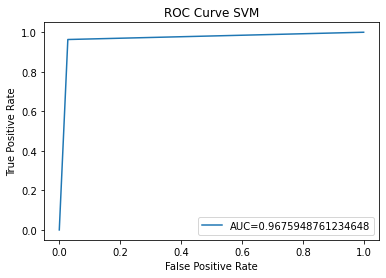

In [ ]:
svmfalsepr, svmtruepr, _ = metrics.roc_curve(y_test,  svm_pred)
svmauc = metrics.roc_auc_score(y_test, svm_pred)

plt.plot(svmfalsepr,svmtruepr,label="AUC="+str(svmauc))
plt.title('ROC Curve SVM')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

### Weighted SVM

Again, using weights can tune the model to be even more focused on precision than tuning other hyperparameters.

In [ ]:
weight_svm_results = []
for w in weight:
  weight_svm = SVC(class_weight = w, C = 17, gamma=0.35, kernel = 'rbf',random_state=3).fit(X_train, y_train)
  svmwcv = cross_val_score(weight_svm, X_train, y_train, cv=10, n_jobs=2, scoring='precision')
  weight_svm_results.append({'weight': w, 'Precision': svmwcv.mean()})

In [ ]:
weight_svm_results_df = pd.DataFrame(weight_svm_results)
weight_svm_results_df

weight  Precision
0    {0: 0.5, 1: 0.5}   0.970671
1    {0: 0.6, 1: 0.4}   0.973556
2    {0: 0.7, 1: 0.3}   0.981705
3  {0: 0.75, 1: 0.25}   0.982362
4    {0: 0.8, 1: 0.2}   0.984104
5  {0: 0.85, 1: 0.15}   0.985455
6    {0: 0.9, 1: 0.1}   0.990084
7  {0: 0.95, 1: 0.05}   0.991683

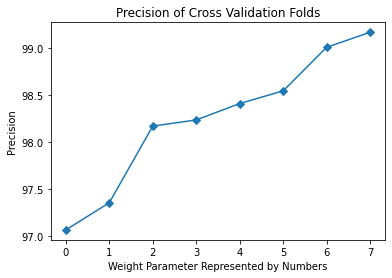

In [ ]:
tick = range(len(weight_svm_results_df['weight']))
plt.plot(weight_svm_results_df['Precision']*100, marker = 'D')
plt.xlabel('Weight Parameter Represented by Numbers')
plt.ylabel('Precision')
plt.title('Precision of Cross Validation Folds')
plt.xticks(ticks=tick)
plt.show()

The 0.95, 0.5 weight again offered the highest precision over the cross validation. 

In [ ]:
weight_svm = SVC(class_weight = {0: 0.95, 1: 0.05}, C = 17, gamma=0.35, 
                 kernel = 'rbf',random_state=3).fit(X_train, y_train)

In [ ]:
w_svm_pred = weight_svm.predict(X_test)


w_svm_acc = accuracy_score(y_test, w_svm_pred)
w_svm_prec = metrics.precision_score(y_test, w_svm_pred)
w_svm_rec = metrics.recall_score(y_test, w_svm_pred)
w_svm_f1 = metrics.f1_score(y_test, w_svm_pred)



print(accuracy_score(y_test, w_svm_pred))
print(metrics.precision_score(y_test, w_svm_pred))

0.9495454545454546
0.9924943707780836


#### Weight SVM Confusion Matrix

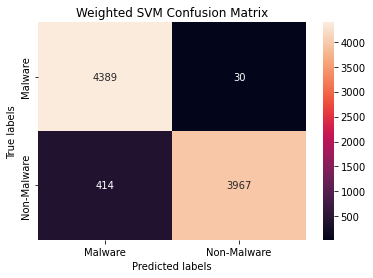

In [ ]:
wsvm_cm = confusion_matrix(y_test, w_svm_pred, labels = [0,1])


ax = plt.subplot()
sns.heatmap(wsvm_cm, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Weighted SVM Confusion Matrix')
ax.xaxis.set_ticklabels(['Malware', 'Non-Malware'])
ax.yaxis.set_ticklabels(['Malware', 'Non-Malware'])
plt.show()

The weighted SVM created a less precise confusion matrix over the test set than the MLP, but it is much more accurate overall with 94% accuracy vs. the weighted MLP's 89% accuracy. 

#### Weighted SVM ROC Curve

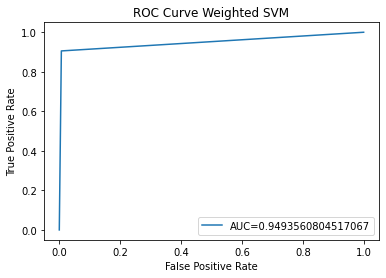

In [ ]:
wsvmfalsepr, wsvmtruepr, _ = metrics.roc_curve(y_test,  w_svm_pred)
wsvmauc = metrics.roc_auc_score(y_test, w_svm_pred)

plt.plot(wsvmfalsepr,wsvmtruepr,label="AUC="+str(wsvmauc))
plt.title('ROC Curve Weighted SVM')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

Below both max depth and ccp_alpha will be tuned to compare the results over the cross validation and the test set. Both parameter tune the complexity of the decision tree in slightly different ways. From previous experience, ccp_alpha will offer a better tune because it is a little more specific than simply specifying the max depth of the tree. 

### Tuning for Max Depth

In [ ]:
DTC_results = []

for d in range(2, 52):
  dtcg = DecisionTreeClassifier(criterion='gini', max_depth = d,random_state=3).fit(X_train, y_train)
  dtce = DecisionTreeClassifier(criterion='entropy', max_depth = d,random_state=3).fit(X_train, y_train)
  cvg = cross_val_score(dtcg, X_train, y_train, cv = 10, n_jobs=2, scoring='precision')
  cve = cross_val_score(dtce, X_train, y_train, cv = 10, n_jobs=2, scoring='precision')
  DTC_results.append({'Depth': d, 'Gini Precision': cvg.mean(), 'Entropy Precision': cve.mean()})

In [ ]:
DTC_results_df = pd.DataFrame(DTC_results)
DTC_results_df

Depth  Gini Precision  Entropy Precision
0       2        0.896935           0.893312
1       3        0.906028           0.904054
2       4        0.907479           0.907469
3       5        0.915952           0.911965
4       6        0.927056           0.931714
5       7        0.936757           0.937558
6       8        0.946284           0.942628
7       9        0.952660           0.952234
8      10        0.953878           0.955032
9      11        0.953454           0.956012
10     12        0.956308           0.957347
11     13        0.961031           0.962052
12     14        0.959779           0.961878
13     15        0.959803           0.961327
14     16        0.960944           0.960685
15     17        0.961173           0.963675
16     18        0.961941           0.962610
17     19        0.961441           0.963553
18     20        0.961634           0.963563
19     21        0.962222           0.963399
20     22        0.963007           0.963069
21     23        0.962523           0.963768
22     24        0.962903           0.962392
23     25        0.962666           0.963671
24     26        0.964073           0.963923
25     27        0.964180           0.963817
26     28        0.964460           0.963340
27     29        0.963145           0.963547
28     30        0.963528           0.962959
29     31        0.963347           0.963137
30     32        0.963347           0.963137
31     33        0.963347           0.963137
32     34        0.963347           0.963137
33     35        0.963347           0.963137
34     36        0.963347           0.963137
35     37        0.963347           0.963137
36     38        0.963347           0.963137
37     39        0.963347           0.963137
38     40        0.963347           0.963137
39     41        0.963347           0.963137
40     42        0.963347           0.963137
41     43        0.963347           0.963137
42     44        0.963347           0.963137
43     45        0.963347           0.963137
44     46        0.963347           0.963137
45     47        0.963347           0.963137
46     48        0.963347           0.963137
47     49        0.963347           0.963137
48     50        0.963347           0.963137
49     51        0.963347           0.963137

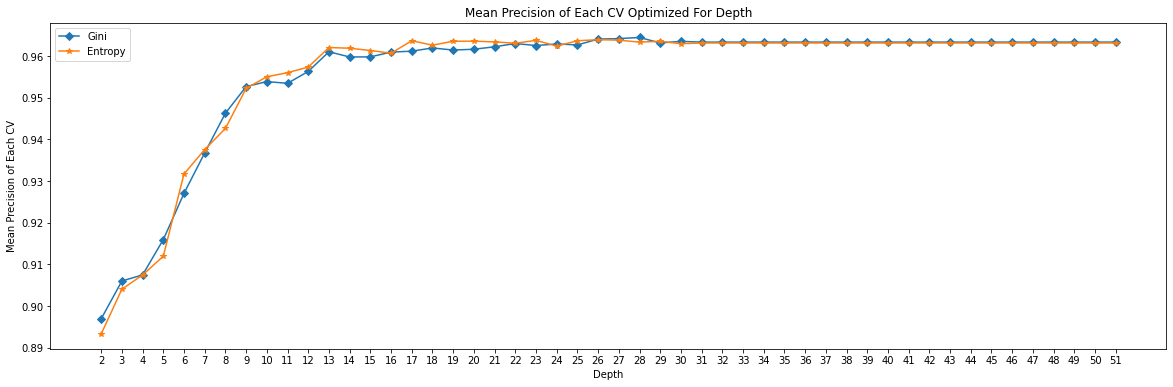

In [ ]:
tick = range(len(DTC_results_df['Depth']))
plt.figure(figsize=(20,6))
plt.plot(DTC_results_df['Gini Precision'], marker = 'D', label = 'Gini')
plt.plot(DTC_results_df['Entropy Precision'], marker = '*', label = 'Entropy')
plt.xlabel('Depth')
plt.ylabel('Mean Precision of Each CV')
plt.title('Mean Precision of Each CV Optimized For Depth')
plt.legend(loc = 'top left')
plt.xticks(ticks=tick, labels=DTC_results_df['Depth'])
plt.show()

The most optimized criterion and depth for the Decision Tree Precision is gini and max_depth = 27. Gini will be the criterion that decides the splits for the model. 

### Tuning for CCP Alpha

In [ ]:
alpha = [0.000001,0.0000025,0.000005,0.00001,0.00005,0.0001,0.0005,0.001]
DTCa_results = []

for a in alpha:
  dtcga = DecisionTreeClassifier(criterion='gini', ccp_alpha = a,random_state=3).fit(X_train, y_train)
  dtcea = DecisionTreeClassifier(criterion='entropy', ccp_alpha = a,random_state=3).fit(X_train, y_train)
  cvga = cross_val_score(dtcga, X_train, y_train, cv = 10, n_jobs=2, scoring='precision')
  cvea = cross_val_score(dtcea, X_train, y_train, cv = 10, n_jobs=2, scoring='precision')
  DTCa_results.append({'Alpha': a, 'Gini Precision': cvga.mean(), 'Entropy Precision': cvea.mean()})

In [ ]:
DTCa_results_df = pd.DataFrame(DTCa_results)
DTCa_results_df

Alpha  Gini Precision  Entropy Precision
0  0.000001        0.963347           0.963137
1  0.000003        0.963347           0.963137
2  0.000005        0.963163           0.963141
3  0.000010        0.963073           0.963048
4  0.000050        0.965826           0.962145
5  0.000100        0.965288           0.964768
6  0.000500        0.953852           0.963523
7  0.001000        0.942996           0.956652

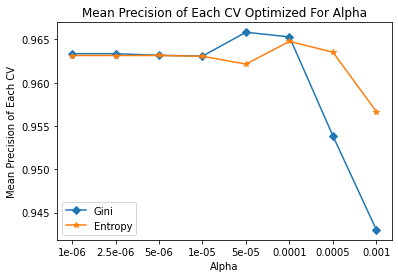

In [ ]:
tick = range(len(DTCa_results_df['Alpha']))
plt.plot(DTCa_results_df['Gini Precision'], marker = 'D', label = 'Gini')
plt.plot(DTCa_results_df['Entropy Precision'], marker = '*', label = 'Entropy')
plt.xlabel('Alpha')
plt.ylabel('Mean Precision of Each CV')
plt.title('Mean Precision of Each CV Optimized For Alpha')
plt.legend(loc = 'lower left')
plt.xticks(ticks=tick, labels=DTCa_results_df['Alpha'])
plt.show()

Similarly, the ccp_alpha complexity tune performed best using gini criterion for deciding splits. The most optimal alpha is 0.00005.

### CCP Alpha Decision Tree Model

In [ ]:
from sklearn.tree import plot_tree
final_dt = DecisionTreeClassifier(criterion = 'gini', ccp_alpha=0.00005, random_state = 3)
final_dt.fit(X_train, y_train)
pred_final_dt = final_dt.predict(X_test)
print(accuracy_score(y_test, pred_final_dt))
print(metrics.precision_score(y_test, pred_final_dt))

0.965
0.9695642148950888


In [ ]:
dt_acc = accuracy_score(y_test, pred_final_dt)
dt_prec = metrics.precision_score(y_test, pred_final_dt)
dt_rec = metrics.recall_score(y_test, pred_final_dt)
dt_f1 = metrics.f1_score(y_test, pred_final_dt)

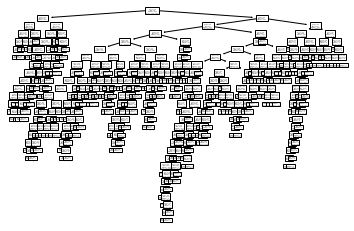

In [ ]:
plot_tree(final_dt)
plt.show()

A general look at the overall complexity of both final trees shows that in addition to performing better on the test set, this decision tree also has a simplier split complexity. 

#### Confusion Matrix CCP Alpha Model

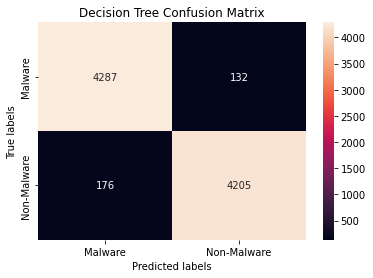

In [ ]:
final_dt_cm = confusion_matrix(y_test, pred_final_dt, labels = [0,1])


ax = plt.subplot()
sns.heatmap(final_dt_cm, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Decision Tree Confusion Matrix')
ax.xaxis.set_ticklabels(['Malware', 'Non-Malware'])
ax.yaxis.set_ticklabels(['Malware', 'Non-Malware'])
plt.show()

The balanced model with a tune towards precision still offered more balanced results on the classes missing around 150 of both class. The precision tune still allows to many false negatives for the business to move forward with. 

#### ROC Curve CCP Alpha Model

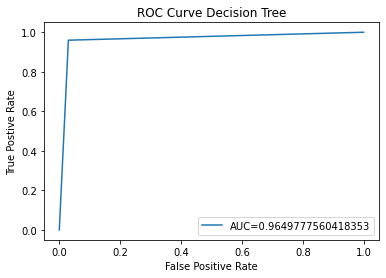

In [ ]:
dtafalsepr, dtatruepr, _ = metrics.roc_curve(y_test,  pred_final_dt)
dtaauc = metrics.roc_auc_score(y_test, pred_final_dt)

plt.plot(dtafalsepr,dtatruepr,label="AUC="+str(dtaauc))
plt.title('ROC Curve Decision Tree')
plt.ylabel('True Postive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

### Max Depth Decision Tree

In [ ]:
fin_dt = DecisionTreeClassifier(criterion='gini', max_depth = 27, random_state = 3)
fin_dt.fit(X_train, y_train)
pred_fin_dt = fin_dt.predict(X_test)
print(accuracy_score(y_test, pred_fin_dt))
print(metrics.precision_score(y_test, pred_fin_dt))

0.9628409090909091
0.9666206261510129


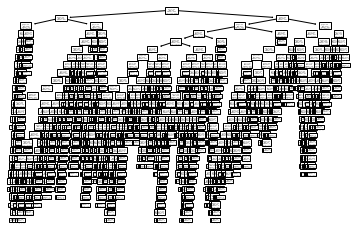

In [ ]:
plot_tree(fin_dt)
plt.show()

#### Max Depth Confusion Matrix

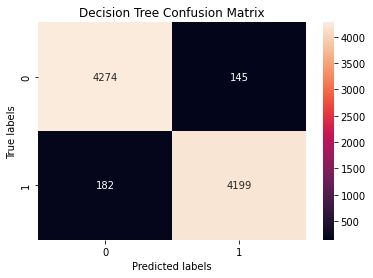

In [ ]:
fin_dt_cm = confusion_matrix(y_test, pred_fin_dt, labels = [0,1])


ax = plt.subplot()
sns.heatmap(fin_dt_cm, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Decision Tree Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])
plt.show()

Using max_depth offered similarly balanced and worse overall results than the ccp_alpha tune. 

#### Max Depth ROC Curve

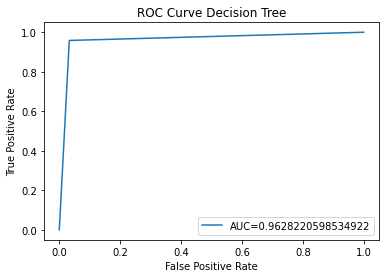

In [ ]:
dtfalsepr, dttruepr, _ = metrics.roc_curve(y_test,  pred_fin_dt)
dtauc = metrics.roc_auc_score(y_test, pred_fin_dt)

plt.plot(dtfalsepr,dttruepr,label="AUC="+str(dtauc))
plt.title('ROC Curve Decision Tree')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

### Weighted Decision Tree

In [ ]:
weight_dt_results = []   

for w in weight: 
  weight_dt = DecisionTreeClassifier(class_weight = w, criterion = 'gini', ccp_alpha=0.00005,random_state=3).fit(X_train,y_train)
  dtwcv = cross_val_score(weight_dt, X_train, y_train, cv = 10, n_jobs=2, scoring='precision')
  weight_dt_results.append({'Weight': w, 'Precision': dtwcv.mean()})

In [ ]:
weight_dt_results_df = pd.DataFrame(weight_dt_results)
weight_dt_results_df

Weight  Precision
0    {0: 0.5, 1: 0.5}   0.965826
1    {0: 0.6, 1: 0.4}   0.970242
2    {0: 0.7, 1: 0.3}   0.974611
3  {0: 0.75, 1: 0.25}   0.977052
4    {0: 0.8, 1: 0.2}   0.979339
5  {0: 0.85, 1: 0.15}   0.980934
6    {0: 0.9, 1: 0.1}   0.986701
7  {0: 0.95, 1: 0.05}   0.989725

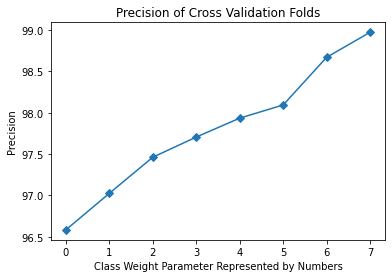

In [ ]:
tick = range(len(weight_dt_results_df['Weight']))
plt.plot(weight_dt_results_df['Precision']*100, marker = 'D')
plt.xlabel('Class Weight Parameter Represented by Numbers')
plt.ylabel('Precision')
plt.title('Precision of Cross Validation Folds')
plt.xticks(ticks=tick)
plt.show()

In [ ]:
weight_dt = DecisionTreeClassifier(class_weight = {0: 0.95, 1: 0.05}, 
                                   criterion = 'gini', ccp_alpha=0.00005,
                                   random_state=3).fit(X_train,y_train)

weight_dt_pred = weight_dt.predict(X_test)

print(accuracy_score(y_test, weight_dt_pred))
print(metrics.precision_score(y_test, weight_dt_pred))

0.935
0.9922460584130266


In [ ]:
w_dt_acc = accuracy_score(y_test, weight_dt_pred)
w_dt_prec = metrics.precision_score(y_test, weight_dt_pred)
w_dt_rec = metrics.recall_score(y_test, weight_dt_pred)
w_dt_f1 = metrics.f1_score(y_test, weight_dt_pred)

#### Weighted Decision Tree Confusion Matrix

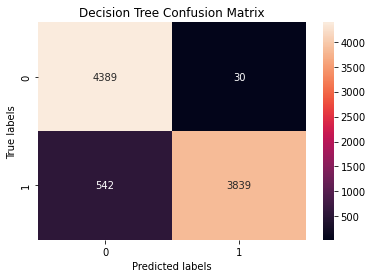

In [ ]:
weight_dt_cm = confusion_matrix(y_test, weight_dt_pred, labels = [0,1])


ax = plt.subplot()
sns.heatmap(weight_dt_cm, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Decision Tree Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])
plt.show()

Weighting the tree did offer an improved precision at the cost of the recall and overall accuracy of the model. The main issue is other models when weighted have found a better precision and better accuracy. 

#### Weighted Decision Tree Roc Curve

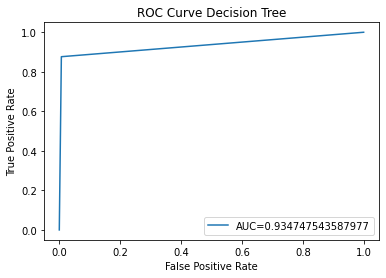

In [ ]:
dtwfalsepr, dtwtruepr, _ = metrics.roc_curve(y_test,  weight_dt_pred)
dtwauc = metrics.roc_auc_score(y_test, weight_dt_pred)

plt.plot(dtwfalsepr,dtwtruepr,label="AUC="+str(dtwauc))
plt.title('ROC Curve Decision Tree')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

### Random Forest Max Depth Tuning

In [ ]:
RF_results = []

for d in range(2, 52):
  RFg = RandomForestClassifier(criterion='gini', max_depth = d).fit(X_train, y_train)
  RFe = RandomForestClassifier(criterion='entropy', max_depth = d).fit(X_train, y_train)
  rfcvg = cross_val_score(RFg, X_train, y_train, cv = 10, n_jobs=2, scoring='precision')
  rfcve = cross_val_score(RFe, X_train, y_train, cv = 10, n_jobs=2, scoring='precision')
  RF_results.append({'Depth': d, 'Gini Precision': rfcvg.mean(), 'Entropy Precision': rfcve.mean()})

In [ ]:
RF_results_df = pd.DataFrame(RF_results)
RF_results_df

Depth  Gini Precision  Entropy Precision
0       2        0.917183           0.920703
1       3        0.928546           0.932540
2       4        0.937779           0.938326
3       5        0.945376           0.944780
4       6        0.945807           0.944022
5       7        0.948557           0.948084
6       8        0.949255           0.949567
7       9        0.953524           0.952274
8      10        0.957436           0.955845
9      11        0.958565           0.959451
10     12        0.960718           0.961113
11     13        0.962927           0.963219
12     14        0.963387           0.963120
13     15        0.964643           0.964239
14     16        0.965370           0.964905
15     17        0.965658           0.965114
16     18        0.965560           0.965734
17     19        0.966222           0.966105
18     20        0.966681           0.965589
19     21        0.966215           0.966292
20     22        0.966180           0.965362
21     23        0.966450           0.965985
22     24        0.967089           0.966452
23     25        0.968752           0.967185
24     26        0.969420           0.968762
25     27        0.969045           0.968664
26     28        0.969404           0.968366
27     29        0.968905           0.969121
28     30        0.969010           0.969379
29     31        0.970036           0.969393
30     32        0.969114           0.970135
31     33        0.969945           0.969662
32     34        0.969482           0.969473
33     35        0.969106           0.969472
34     36        0.970236           0.968911
35     37        0.969353           0.969489
36     38        0.970493           0.969658
37     39        0.969180           0.969657
38     40        0.969481           0.969186
39     41        0.969674           0.969015
40     42        0.969565           0.970129
41     43        0.969556           0.969208
42     44        0.969395           0.969655
43     45        0.970339           0.969834
44     46        0.970332           0.969089
45     47        0.970594           0.970143
46     48        0.970398           0.968908
47     49        0.970120           0.968717
48     50        0.969966           0.969948
49     51        0.969588           0.968635

### Random Forest Alpha Tuning

In [ ]:
alpha = [0.000001,0.0000025,0.000005,0.00001,0.00005,0.0001,0.0005,0.001]
rfa_results = []

for a in alpha:
  rfga = RandomForestClassifier(criterion='gini', ccp_alpha = a).fit(X_train, y_train)
  rfea = RandomForestClassifier(criterion='entropy', ccp_alpha = a).fit(X_train, y_train)
  rfcvga = cross_val_score(rfga, X_train, y_train, cv = 10, n_jobs=2, scoring='precision')
  rfcvea = cross_val_score(rfea, X_train, y_train, cv = 10, n_jobs=2, scoring='precision')
  rfa_results.append({'Alpha': a, 'Gini Precision': rfcvga.mean(), 'Entropy Precision': rfcvea.mean()})

In [ ]:
rfa_results_df = pd.DataFrame(rfa_results)
rfa_results_df

Alpha  Gini Precision  Entropy Precision
0  0.000001        0.970321           0.969671
1  0.000003        0.969360           0.969302
2  0.000005        0.969382           0.970141
3  0.000010        0.970122           0.968917
4  0.000050        0.971260           0.969275
5  0.000100        0.968258           0.969828
6  0.000500        0.956519           0.961144
7  0.001000        0.953402           0.957191

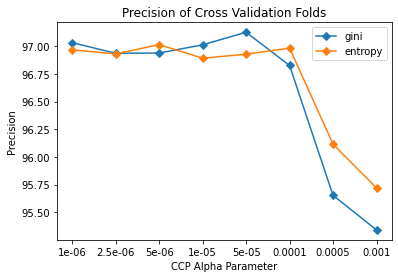

In [ ]:
tick = range(len(rfa_results_df['Alpha']))
plt.plot(rfa_results_df['Gini Precision']*100, marker = 'D', label = 'gini')
plt.plot(rfa_results_df['Entropy Precision']*100, marker = 'D', label = 'entropy')
plt.xlabel('CCP Alpha Parameter')
plt.ylabel('Precision')
plt.title('Precision of Cross Validation Folds')
plt.legend()
plt.xticks(ticks=tick, labels=rfa_results_df['Alpha'])
plt.show()

The CCP_alpha tune offered better results, it will be used going forward in building the final RF and weighted RF model. Gini criterion was the best splitting process like the Decision Tree and an alpha of 0.00005 again was the best complexity control parameter.



## Random Forest Final Model

In [ ]:
final_rf = RandomForestClassifier(criterion = 'gini',ccp_alpha = 0.00005).fit(X_train,y_train)

In [ ]:
pred_rf = final_rf.predict(X_test)
print(accuracy_score(y_test, pred_rf))
print(metrics.precision_score(y_test, pred_rf))

0.96875
0.9732595666205625


In [ ]:
rf_acc = accuracy_score(y_test, pred_rf)
rf_prec = metrics.precision_score(y_test, pred_rf)
rf_rec = metrics.recall_score(y_test, pred_rf)
rf_f1 = metrics.f1_score(y_test, pred_rf)

#### Random Forest Confusion Matrix

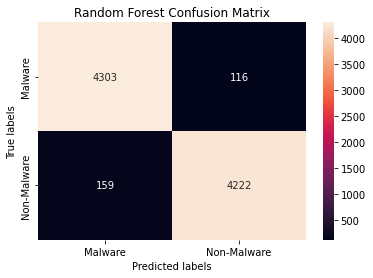

In [ ]:
fin_rf_cm = confusion_matrix(y_test, pred_rf, labels = [0,1])


ax = plt.subplot()
sns.heatmap(fin_rf_cm, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Random Forest Confusion Matrix')
ax.xaxis.set_ticklabels(['Malware', 'Non-Malware'])
ax.yaxis.set_ticklabels(['Malware', 'Non-Malware'])
plt.show()

Of the non-weighted final models, the Random Forest offered the best precision, with false negatives nearly dipping to 100. Still it seems that weighting the classes could offer a better solution to our problem. 

#### Random Forest ROC Curve

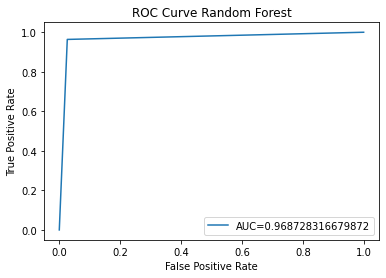

In [ ]:
rffalsepr, rftruepr, _ = metrics.roc_curve(y_test,  pred_rf)
rfauc = metrics.roc_auc_score(y_test, pred_rf)

plt.plot(rffalsepr,rftruepr,label="AUC="+str(rfauc))
plt.title('ROC Curve Random Forest')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

### Weighted Random Forest

In [ ]:
weight_rf_results = []   

for w in weight: 
  weight_rf = RandomForestClassifier(class_weight = w, criterion = 'entropy',max_depth = 37).fit(X_train,y_train)
  rfwcv= cross_val_score(weight_rf, X_train, y_train, cv = 10, n_jobs=2, scoring='precision')
  weight_rf_results.append({'Weight': w, 'Precision': rfwcv.mean()})

In [ ]:
weight_rf_results_df = pd.DataFrame(weight_rf_results)
weight_rf_results_df

Weight  Precision
0    {0: 0.5, 1: 0.5}   0.969583
1    {0: 0.6, 1: 0.4}   0.971009
2    {0: 0.7, 1: 0.3}   0.977360
3  {0: 0.75, 1: 0.25}   0.978131
4    {0: 0.8, 1: 0.2}   0.978044
5  {0: 0.85, 1: 0.15}   0.979445
6    {0: 0.9, 1: 0.1}   0.982998
7  {0: 0.95, 1: 0.05}   0.983064

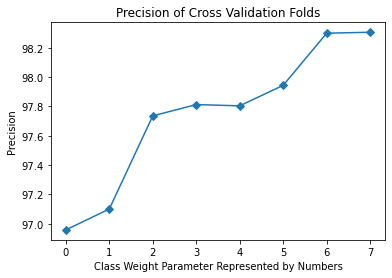

In [ ]:
tick = range(len(weight_rf_results_df['Weight']))
plt.plot(weight_rf_results_df['Precision']*100, marker = 'D')
plt.xlabel('Class Weight Parameter Represented by Numbers')
plt.ylabel('Precision')
plt.title('Precision of Cross Validation Folds')
plt.xticks(ticks=tick)
plt.show()

Again, the 95:05 class weights offered the best precision.

In [ ]:
weight_rf = RandomForestClassifier(class_weight = {0:0.9,1:0.1}, criterion = 'gini',ccp_alpha = 0.00005, random_state=3).fit(X_train,y_train)
pred_w_rf = weight_rf.predict(X_test)
print(accuracy_score(y_test, pred_w_rf))
print(metrics.precision_score(y_test, pred_w_rf))

0.94875
0.9947129909365559


In [ ]:
w_rf_acc = accuracy_score(y_test, pred_w_rf)
w_rf_prec = metrics.precision_score(y_test, pred_w_rf)
w_rf_rec = metrics.recall_score(y_test, pred_w_rf)
w_rf_f1 = metrics.f1_score(y_test, pred_w_rf)

#### Weighted Random Forest Confusion Matrix

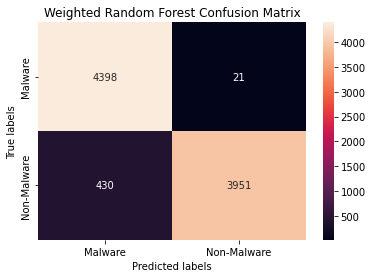

In [ ]:
w_rf_cm = confusion_matrix(y_test, pred_w_rf, labels = [0,1])


ax = plt.subplot()
sns.heatmap(w_rf_cm, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Weighted Random Forest Confusion Matrix')
ax.xaxis.set_ticklabels(['Malware', 'Non-Malware'])
ax.yaxis.set_ticklabels(['Malware', 'Non-Malware'])
plt.show()

The false negatives were reduced to 21 applications while the false positives only increased to 430, compared to other weighted models that were over 600 false positives. This model can potentially flag an extremely high percentage of malware applications, about 99.4% while maintaining a high overall accuracy of 94.5% to not spam consumers with flagged malware applications for their attention

#### Weighted Random Forest Roc Curve

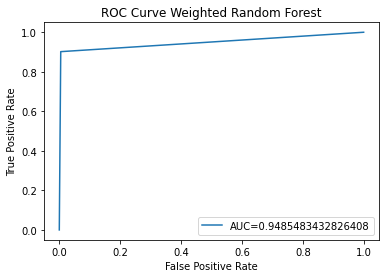

In [ ]:
rfwfalsepr, rfwtruepr, _ = metrics.roc_curve(y_test,  pred_w_rf)
rfwauc = metrics.roc_auc_score(y_test, pred_w_rf)

plt.plot(rfwfalsepr,rfwtruepr,label="AUC="+str(rfwauc))
plt.title('ROC Curve Weighted Random Forest')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Extra Tree Classifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

### Extra Tree Depth Tuning

In [ ]:
ET_results = []

for d in range(2, 52):
  etg = ExtraTreesClassifier(criterion='gini', max_depth = d, random_state=3).fit(X_train, y_train)
  ete = ExtraTreesClassifier(criterion='entropy', max_depth = d,random_state=3).fit(X_train, y_train)
  etcvg = cross_val_score(etg, X_train, y_train, cv = 10, n_jobs=2, scoring='precision')
  etcve = cross_val_score(ete, X_train, y_train, cv = 10, n_jobs=2, scoring='precision')
  ET_results.append({'Depth': d, 'Gini Precision': etcvg.mean(), 'Entropy Precision': etcve.mean()})

In [ ]:
et_results_df = pd.DataFrame(ET_results)
et_results_df

### Extra Tree Alpha Tuning

In [ ]:
alpha = [0.000001,0.0000025,0.000005,0.00001,0.00005,0.0001,0.0005,0.001]
eta_results = []

for a in alpha:
  etga = ExtraTreesClassifier(criterion='gini', ccp_alpha = a,random_state=3).fit(X_train, y_train)
  etea = ExtraTreesClassifier(criterion='entropy', ccp_alpha = a,random_state=3).fit(X_train, y_train)
  etcvga = cross_val_score(etga, X_train, y_train, cv = 10, n_jobs=2, scoring='precision')
  etcvea = cross_val_score(etea, X_train, y_train, cv = 10, n_jobs=2, scoring='precision')
  eta_results.append({'Alpha': a, 'Gini Precision': etcvga.mean(), 'Entropy Precision': etcvea.mean()})

In [ ]:
eta_results_df = pd.DataFrame(eta_results)
eta_results_df

Alpha  Gini Precision  Entropy Precision
0  0.000001        0.971325           0.970467
1  0.000003        0.971049           0.970184
2  0.000005        0.970685           0.970092
3  0.000010        0.970604           0.969646
4  0.000050        0.972396           0.970121
5  0.000100        0.969374           0.971721
6  0.000500        0.956990           0.961317
7  0.001000        0.951330           0.957006

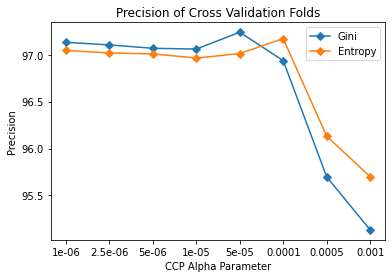

In [ ]:
tick = range(len(eta_results_df['Alpha']))
plt.plot(eta_results_df['Gini Precision']*100, marker = 'D', label = 'Gini')
plt.plot(eta_results_df['Entropy Precision']*100, marker = 'D', label = 'Entropy')
plt.xlabel('CCP Alpha Parameter')
plt.ylabel('Precision')
plt.title('Precision of Cross Validation Folds')
plt.legend()
plt.xticks(ticks=tick, labels=eta_results_df['Alpha'])
plt.show()

Similar to the RF, ET offered better results by tuning the complexity on CCP alpha rather than max_depth. Again Gini splits suited the data better for the criterion, and the most precise CCP Alpha tune is again 0.00005 for Extra Trees, same as DT and RF.

### Extra Tree Final Model

In [ ]:
final_et = ExtraTreesClassifier(criterion='gini',ccp_alpha = 0.00005,random_state=3).fit(X_train,y_train)

In [ ]:
pred_et = final_et.predict(X_test)

print(accuracy_score(y_test, pred_et))
print(metrics.precision_score(y_test, pred_et))

0.9672727272727273
0.9731791907514451


In [ ]:
et_acc = accuracy_score(y_test, pred_et)
et_prec = metrics.precision_score(y_test, pred_et)
et_rec = metrics.recall_score(y_test, pred_et)
et_f1 = metrics.f1_score(y_test, pred_et)

#### Extra Trees Confusion Matrix

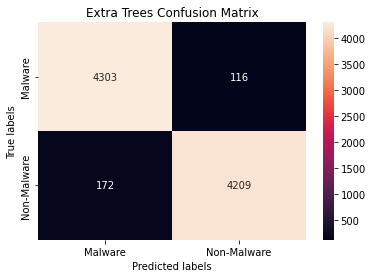

In [ ]:
fin_et_cm = confusion_matrix(y_test, pred_et, labels = [0,1])


ax = plt.subplot()
sns.heatmap(fin_et_cm, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Extra Trees Confusion Matrix')
ax.xaxis.set_ticklabels(['Malware', 'Non-Malware'])
ax.yaxis.set_ticklabels(['Malware', 'Non-Malware'])
plt.show()

The Extra Trees Final model offered similar results to the random forest. A strong model for both precision that also minimizes false positive flagging with its overall accuracy. 

#### Extra Trees ROC Curve

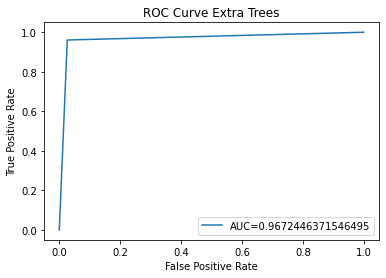

In [ ]:
etfalsepr, ettruepr, _ = metrics.roc_curve(y_test,  pred_et)
etauc = metrics.roc_auc_score(y_test, pred_et)

plt.plot(etfalsepr,ettruepr,label="AUC="+str(etauc))
plt.title('ROC Curve Extra Trees')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

### Weighted Extra Trees

In [ ]:
weight_et_results = []   

for w in weight: 
  weight_et = ExtraTreesClassifier(class_weight = w, criterion = 'entropy',max_depth = 37,random_state=3).fit(X_train,y_train)
  etwcv= cross_val_score(weight_et, X_train, y_train, cv = 10, n_jobs=2, scoring='precision')
  weight_et_results.append({'Weight': w, 'Precision': etwcv.mean()})

In [ ]:
weight_et_results_df = pd.DataFrame(weight_et_results)

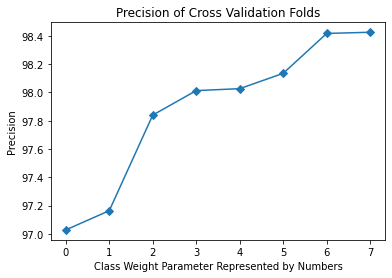

In [ ]:
tick = range(len(weight_et_results_df['Weight']))
plt.plot(weight_et_results_df['Precision']*100, marker = 'D')
plt.xlabel('Class Weight Parameter Represented by Numbers')
plt.ylabel('Precision')
plt.title('Precision of Cross Validation Folds')
plt.xticks(ticks=tick)
plt.show()

The chosen weight is again 95:05 as the most optimized precision.

In [ ]:
weight_et = ExtraTreesClassifier(criterion='gini',ccp_alpha = 0.00005,class_weight = {0:.95,1:.05},random_state=3).fit(X_train,y_train)

In [ ]:
pred_weight_et = weight_et.predict(X_test)

print(accuracy_score(y_test, pred_weight_et))
print(metrics.precision_score(y_test, pred_weight_et))

0.9273863636363636
0.998136315228967


In [ ]:
w_et_acc = accuracy_score(y_test, pred_weight_et)
w_et_prec = metrics.precision_score(y_test, pred_weight_et)
w_et_rec = metrics.recall_score(y_test, pred_weight_et)
w_et_f1 = metrics.f1_score(y_test, pred_weight_et)

#### Weighted Extra Trees Confusion Matrix

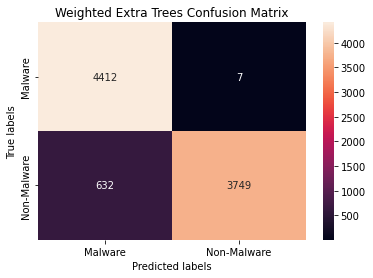

In [ ]:
weight_et_cm = confusion_matrix(y_test, pred_weight_et, labels = [0,1])


ax = plt.subplot()
sns.heatmap(weight_et_cm, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Weighted Extra Trees Confusion Matrix')
ax.xaxis.set_ticklabels(['Malware', 'Non-Malware'])
ax.yaxis.set_ticklabels(['Malware', 'Non-Malware'])
plt.show()

The Extra Trees offers both a strong precision with only 7 false negative classifications and a decent overall accuracy at 92%. Compared to the RF, the accuracy decrease cause about 200 more false positives while only removing 9 false negatives. Ultimately this trade off may not be worthwhile when flagging applications to notify consumers of when compared to the Random Forest.

#### Weighted Extra Trees ROC Curve

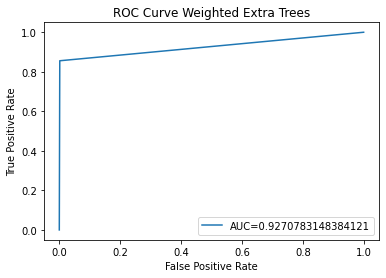

In [ ]:
etwfalsepr, etwtruepr, _ = metrics.roc_curve(y_test,  pred_weight_et)
etwauc = metrics.roc_auc_score(y_test, pred_weight_et)

plt.plot(etwfalsepr,etwtruepr,label="AUC="+str(etwauc))
plt.title('ROC Curve Weighted Extra Trees')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

### Tuning For Penalty

In [ ]:
lr_results = []

lrl1 = LogisticRegression(penalty = 'l1', solver = 'saga',random_state=3).fit(X_train, y_train)
lrl2 = LogisticRegression(penalty = 'l2',random_state=3).fit(X_train, y_train)
l1cv = cross_val_score(lrl1, X_train, y_train, cv = 10, n_jobs = 2, scoring = 'precision')
l2cv = cross_val_score(lrl2, X_train, y_train, cv = 10, n_jobs = 2, scoring = 'precision')
lr_results.append({'LR L1 Precision': l1cv.mean(), 'LR L2 Precision': l2cv.mean()})

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [ ]:
pd.DataFrame(lr_results)

LR L1 Precision  LR L2 Precision
0         0.952893         0.951387

L1 penalty with saga solver offered stronger precision. 

### Final Logistic Regression Model

In [ ]:
lr = LogisticRegression(penalty = 'l1',solver = 'saga', random_state=3).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [ ]:
lr_pred = lr.predict(X_test)
print(accuracy_score(y_test, lr_pred))
print(metrics.precision_score(y_test, lr_pred))

0.9593181818181818
0.95809610567069


In [ ]:
lr_acc = accuracy_score(y_test, lr_pred)
lr_prec = metrics.precision_score(y_test, lr_pred)
lr_rec = metrics.recall_score(y_test, lr_pred)
lr_f1 = metrics.f1_score(y_test, lr_pred)

#### LR Confusion Matrix

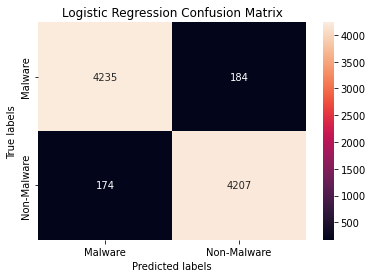

In [ ]:
lrcm = confusion_matrix(y_test, lr.predict(X_test), labels = [0,1])


ax = plt.subplot()
sns.heatmap(lrcm, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Logistic Regression Confusion Matrix')
ax.xaxis.set_ticklabels(['Malware', 'Non-Malware'])
ax.yaxis.set_ticklabels(['Malware', 'Non-Malware'])
plt.show()

This model offered balanced results that did not meet the standards of any other model.

#### LR ROC Curve

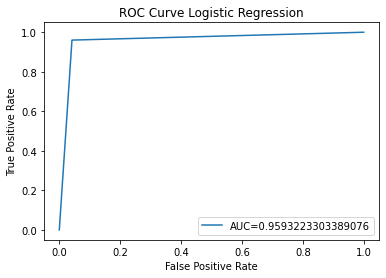

In [ ]:
lrfalsepr, lrtruepr, _ = metrics.roc_curve(y_test,  lr_pred)
lrauc = metrics.roc_auc_score(y_test, lr_pred)

plt.plot(lrfalsepr,lrtruepr,label="AUC="+str(lrauc))
plt.title('ROC Curve Logistic Regression')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

### Weighted Logistic Regression Model

In [ ]:
lrw_results = []

for w in weight:
  wlr = LogisticRegression(class_weight = w, random_state=3).fit(X_train, y_train)
  wlrcv = cross_val_score(wlr, X_train, y_train, cv = 10, n_jobs = 2, scoring = 'precision')
  lrw_results.append({'weight': w,'Precision': wlrcv.mean()})

In [ ]:
lrw_results_df = pd.DataFrame(lrw_results)
lrw_results_df

weight  Precision
0    {0: 0.5, 1: 0.5}   0.948419
1    {0: 0.6, 1: 0.4}   0.956354
2    {0: 0.7, 1: 0.3}   0.968652
3  {0: 0.75, 1: 0.25}   0.973507
4    {0: 0.8, 1: 0.2}   0.978677
5  {0: 0.85, 1: 0.15}   0.981070
6    {0: 0.9, 1: 0.1}   0.989579
7  {0: 0.95, 1: 0.05}   0.993890

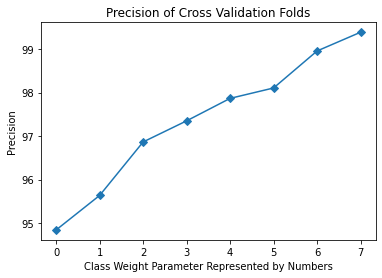

In [ ]:
tick = range(len(lrw_results_df['weight']))
plt.plot(lrw_results_df['Precision']*100, marker = 'D')
plt.xlabel('Class Weight Parameter Represented by Numbers')
plt.ylabel('Precision')
plt.title('Precision of Cross Validation Folds')
plt.xticks(ticks=tick)
plt.show()

In [ ]:
weight_lr = LogisticRegression(class_weight = {0:.95,1:.05}, random_state=3).fit(X_train, y_train)

In [ ]:
wlr_pred = weight_lr.predict(X_test)
print(accuracy_score(y_test, wlr_pred))
print(metrics.precision_score(y_test, wlr_pred))

0.8855681818181819
0.9938524590163934


In [ ]:
w_lr_acc = accuracy_score(y_test, wlr_pred)
w_lr_prec = metrics.precision_score(y_test, wlr_pred)
w_lr_rec = metrics.recall_score(y_test, wlr_pred)
w_lr_f1 = metrics.f1_score(y_test, wlr_pred)

#### Weighted LR Confusion Matrix

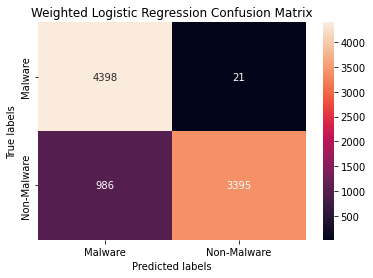

In [ ]:
lrwcm = confusion_matrix(y_test, wlr_pred, labels = [0,1])


ax = plt.subplot()
sns.heatmap(lrwcm, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Weighted Logistic Regression Confusion Matrix')
ax.xaxis.set_ticklabels(['Malware', 'Non-Malware'])
ax.yaxis.set_ticklabels(['Malware', 'Non-Malware'])
plt.show()

The Weighted Logistic Regression made too many errors on the non-malware class to be further considered. 

#### Weighted LR ROC Curve 

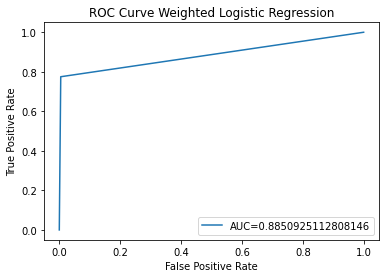

In [ ]:
wlrfalsepr, wlrtruepr, _ = metrics.roc_curve(y_test,  wlr_pred)
wlrauc = metrics.roc_auc_score(y_test, wlr_pred)

plt.plot(wlrfalsepr,wlrtruepr,label="AUC="+str(wlrauc))
plt.title('ROC Curve Weighted Logistic Regression')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## ROC Curve Final Models

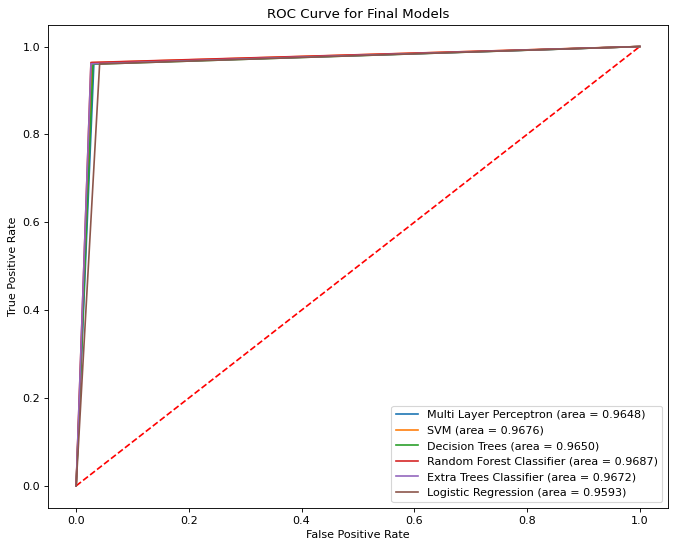

In [ ]:
plt.figure(figsize=(10,8),dpi=80)
plt.plot([0,1],[0,1],'r--')

plt.plot(mlpfalsepr, mlptruepr, label = 'Multi Layer Perceptron (area = %0.4f)' %mlpauc);
plt.plot(svmfalsepr, svmtruepr, label = 'SVM (area = %0.4f)' %svmauc);
plt.plot(dtafalsepr, dtatruepr, label = 'Decision Trees (area = %0.4f)' %dtaauc);
plt.plot(rffalsepr, rftruepr, label = 'Random Forest Classifier (area = %0.4f)' %rfauc);
plt.plot(etfalsepr, ettruepr, label = 'Extra Trees Classifier (area = %0.4f)' %etauc);
plt.plot(lrfalsepr,lrtruepr, label = 'Logistic Regression (area = %0.4f)' %lrauc);
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('ROC Curve for Final Models');
plt.legend();

The final model tuned for precision offered strong, balanced solutions when compared to the weighted models below. The strongest at making the most precise and overall accurate predictions was the Random Forest Classifier. Although, these models are all very close to each other as far as AUC. The Random Forest is quick to train and easy to deploy while offering the best solution out of this group of models, due to this Random Forest would need to be chosen out of these final models. 

### ROC Curve Weighted Models

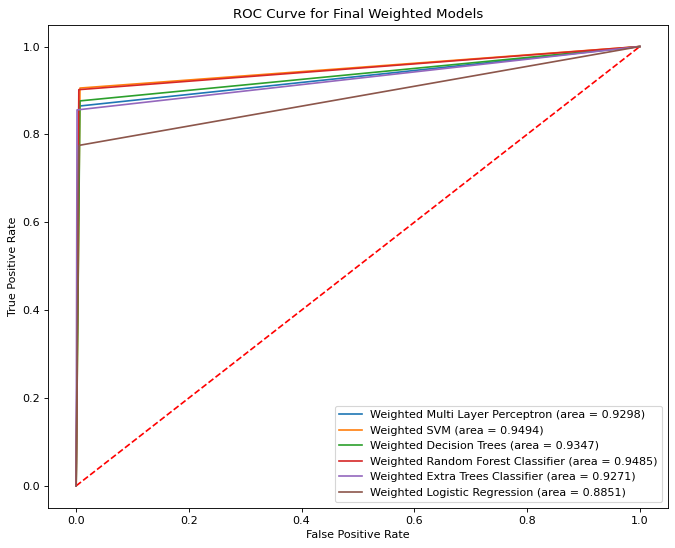

In [ ]:
plt.figure(figsize=(10,8),dpi=80)
plt.plot([0,1],[0,1],'r--')

plt.plot(mlpwfalsepr, mlpwtruepr, label = 'Weighted Multi Layer Perceptron (area = %0.4f)' %mlpwauc);
plt.plot(wsvmfalsepr, wsvmtruepr, label = 'Weighted SVM (area = %0.4f)' %wsvmauc);
plt.plot(dtwfalsepr, dtwtruepr, label = 'Weighted Decision Trees (area = %0.4f)' %dtwauc);
plt.plot(rfwfalsepr, rfwtruepr, label = 'Weighted Random Forest Classifier (area = %0.4f)' %rfwauc);
plt.plot(etwfalsepr, etwtruepr, label = 'Weighted Extra Trees Classifier (area = %0.4f)' %etwauc);
plt.plot(wlrfalsepr,wlrtruepr, label = 'Weighted Logistic Regression (area = %0.4f)' %wlrauc);
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('ROC Curve for Final Weighted Models');
plt.legend();

Looking at the weighted models that offer better precision than the models graphed above, the random forest and SVM clearly offer the best auc. The SVM did not reach the same precision as the Random Forest. Additionally when considering deploying the model for the business, the SVM is far more costly and time consuming to train when compared to the random forest. Both also do not offer great interpretability. That is why when choosing from the weighted models based off of auc, the Random Forest offered the best results. 

## Performance Metrics For Both Final and Weighted Models

In [ ]:
final_metrics = pd.DataFrame({'Metrics': ['Accuracy','Precision','Recall','F1','AUC'],
              'MLP': [mlp_acc,mlp_prec,mlp_rec,mlp_f1,mlpauc],
              'Weighted MLP': [w_mlp_acc,w_mlp_prec,w_mlp_rec,w_mlp_f1,mlpwauc],
              'SVM': [svm_acc,svm_prec,svm_rec,svm_f1,svmauc],
              'Weighted SVM': [w_svm_acc,w_svm_prec,w_svm_rec,w_svm_f1,wsvmauc],
              'Decision Tree': [dt_acc,dt_prec,dt_rec,dt_f1,dtaauc],
              'Weighted Decision Tree': [w_dt_acc,w_dt_prec,w_dt_rec,w_dt_f1,dtwauc],
              'Random Forest': [rf_acc,rf_prec,rf_rec,rf_f1,rfauc],
              'Weighted Random Forest': [w_rf_acc,w_rf_prec,w_rf_rec,w_rf_f1,rfwauc],
              'Extra Trees': [et_acc,et_prec,et_rec,et_f1,etauc],
              'Weighted Extra Trees': [w_et_acc,w_et_prec,w_et_rec,w_et_f1,etwauc],
              'Logistic Regression': [lr_acc,lr_prec,lr_rec,lr_f1,lrauc],
              'Weighted Logistic Regression': [w_lr_acc,w_lr_prec,w_lr_rec,w_lr_f1,wlrauc]})
final_metrics

Metrics       MLP  Weighted MLP       SVM  Weighted SVM  Decision Tree  \
0   Accuracy  0.964773      0.920000  0.967614      0.949545       0.965000   
1  Precision  0.968039      0.995152  0.971455      0.992494       0.969564   
2     Recall  0.960968      0.843415  0.963250      0.905501       0.959827   
3         F1  0.964490      0.913022  0.967335      0.947004       0.964671   
4        AUC  0.964756      0.919671  0.967595      0.949356       0.964978   

   Weighted Decision Tree  Random Forest  Weighted Random Forest  Extra Trees  \
0                0.935000       0.968750                0.948750     0.967273   
1                0.992246       0.973260                0.994713     0.973179   
2                0.876284       0.963707                0.901849     0.960740   
3                0.930667       0.968460                0.946007     0.966919   
4                0.934748       0.968728                0.948548     0.967245   

   Weighted Extra Trees  Logistic Regression  Weighted Logistic Regression  
0              0.927386             0.959318                      0.885568  
1              0.998136             0.958096                      0.993852  
2              0.855741             0.960283                      0.774937  
3              0.921470             0.959188                      0.870848  
4              0.927078             0.959322                      0.885093

Looking at our model metrics. The weighted MLP, Weighted Random Forest, Weighted SVM, and Weighted Etra Trees have offered the strongest precision out of the grouping. The business plan has dictated that a model must meet a minimum threshold of 93% overall accuracy in order to avoid spamming consumers with flagged applications. Due to this, the weighted SVM and weighted RF offered the best precision above the 93% threshold. Weighted RF had better precision slightly at 99.47% vs. 99.25% while the SVM offered slightly better accuracy and recall at 94.95% & 90.55% vs. 94.88% & 90.18%. Considering that the weighted RF offers the best precision in addition to faster training and easier deployment while reaching the minimum threshold as dictated by the business plan, the weighted RF is then the best choice given our choices here. 

## Feature Importance for Weighted Random Forest (selected model)

Text(0.5, 1.0, 'Weighted Top 20 Feature Importance')

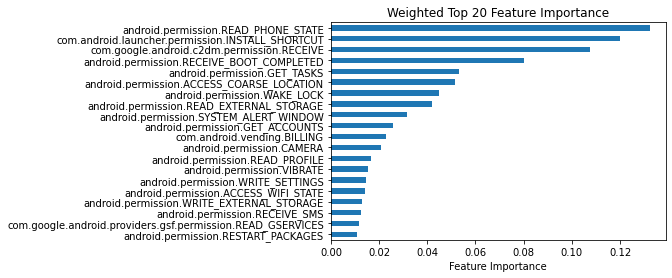

In [ ]:
feat_importances = pd.Series(weight_rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh').invert_yaxis()
plt.xlabel("Feature Importance")
plt.title("Weighted Top 20 Feature Importance")

Considering the final model's most important features will be important when working with the data further and pushing the model into production. RF does perform feature selection, and there are clearly a handful of features deemed more important to model creation. 

The top two permission read_phone_state and install_shortcut also were most represented in only malware applications. Perhaps future research can be done to lock these permissions entirely aside from certified applications that are safe in order to try and avoid more malicious applications entirely. 